# In this dataset, the only examples we will consider are the pure non-clapping( only 1 non-clapping human label) and pure clapping(only clapping) label.

# Audio extraction to extract embeddings(features) and labels

In [1]:
import os
os.chdir('/home/anirudh/Desktop/OUR Stuff/class_labels indices')

In [2]:
import tensorflow as tf
import numpy as np

Labels are stored in the dataset and indexed by midpoint value. They can be found in class_labels_indices.csv. We will store the index of Clapping

In [3]:
class_label_index = !grep Clapping class_labels_indices.csv

In [4]:
class_label_index

['63,/m/0l15bq,Clapping']

examples will store the examples of clapping present in the balanced_train_segments.csv. We will use mid-point to store the clapping examples.

In [5]:
examples = !grep /m/0l15bq balanced_train_segments.csv

In [6]:
examples

['0FMdORf5iGs, 30.000, 40.000, "/m/04rlf,/m/081rb,/m/09x0r,/m/0l15bq"',
 '1IxBagCJeZc, 150.000, 160.000, "/m/01j3sz,/m/09x0r,/m/0l15bq"',
 '1_DouJRW3PM, 30.000, 40.000, "/m/028ght,/m/09x0r,/m/0l15bq"',
 '2y9ikTsTsl0, 30.000, 40.000, "/m/028ght,/m/09x0r,/m/0l15bq"',
 '3PliaLqMSqg, 30.000, 40.000, "/m/028ght,/m/09x0r,/m/0l15bq"',
 '3ixOXsKUufM, 30.000, 40.000, "/m/0l15bq"',
 '4mOTOTJLv5U, 0.000, 10.000, "/m/09x0r,/m/0l15bq,/m/0ytgt"',
 '7Ep2a7_sbmc, 260.000, 270.000, "/m/09x0r,/m/0l15bq"',
 '7SpYywlGPyM, 30.000, 40.000, "/m/09x0r,/m/0k65p,/m/0l15bq,/m/0ytgt"',
 'AiGF0850kT8, 6.000, 16.000, "/m/04rlf,/m/0l15bq"',
 'ApJA85gwNFo, 30.000, 40.000, "/m/0l15bq"',
 'B-XS7rGmG0o, 30.000, 40.000, "/m/0l15bq"',
 'C3HqFyYZBGI, 30.000, 40.000, "/m/01h8n0,/m/09x0r,/m/0l15bq"',
 'CKogmNGkGHE, 180.000, 190.000, "/m/015lz1,/m/0326g,/m/04rlf,/m/09x0r,/m/0l15bq"',
 'Cq9_hnJw5Rs, 400.000, 410.000, "/m/09x0r,/m/0l15bq"',
 'DEBKRavuTfM, 10.000, 20.000, "/m/0l15bq"',
 'DSa3YoTNoZA, 0.000, 10.000, "/m/0k65p,/m/

In [7]:
len(examples)

60

Store the number of clapping examples in unbal and eval

In [8]:
example_unbal = !grep /m/0l15bq unbalanced_train_segments.csv

In [9]:
len(example_unbal)

670

In [10]:
example_unbal

['-1xXADXCgvM, 110.000, 120.000, "/m/09x0r,/m/0l15bq,/m/0y4f8,/m/0z9c"',
 '-4kQf5Q1MjM, 590.000, 600.000, "/m/02x8m,/m/03_d0,/m/04rlf,/m/0l15bq"',
 '-FRGpQEpEWM, 30.000, 40.000, "/m/01h8n0,/m/04rlf,/m/05zppz,/m/09x0r,/m/0l15bq"',
 '-KDGyomc3yE, 30.000, 40.000, "/m/04rlf,/m/0l15bq"',
 '-RPIKZn47yg, 30.000, 40.000, "/m/04rlf,/m/0l15bq"',
 '-SnXeLcvG6U, 30.000, 40.000, "/m/0l15bq"',
 '-YDgnw597_g, 30.000, 40.000, "/m/028ght,/m/03qtwd,/m/07pyf11,/m/07qfr4h,/m/0l15bq"',
 '-_RgQWbm61k, 30.000, 40.000, "/m/04rlf,/m/053hz1,/m/0l15bq"',
 '-c0w-vqJuVk, 30.000, 40.000, "/m/0342h,/m/042v_gx,/m/04rlf,/m/04szw,/m/07s0s5r,/m/09x0r,/m/0fx80y,/m/0l15bq"',
 '-fjg3-sh_Wg, 30.000, 40.000, "/m/028ght,/m/053hz1,/m/07qfr4h,/m/09x0r,/m/0l15bq"',
 '-iOkbNGFmIo, 130.000, 140.000, "/m/0l15bq"',
 '-puDJHWfuKI, 60.000, 70.000, "/m/09x0r,/m/0l15bq,/m/0y4f8"',
 '-r6BtXuCdH0, 50.000, 60.000, "/m/09x0r,/m/0l15bq"',
 '-ue1h6qUXp0, 430.000, 440.000, "/m/0l15bq"',
 '01SvT7xW52E, 30.000, 40.000, "/m/028ght,/m/03qtwd,/m/04

Store only single label Clapping examples present in the unbalanced clapping example. We see that the length of a single labelled example is 42.

In [11]:
example_unbal_sing = []
for i in range(len(example_unbal)):
    if len(example_unbal[i]) < 43:
            example_unbal_sing.append(example_unbal[i])

In [12]:
example_unbal_sing

['-SnXeLcvG6U, 30.000, 40.000, "/m/0l15bq"',
 '-iOkbNGFmIo, 130.000, 140.000, "/m/0l15bq"',
 '-ue1h6qUXp0, 430.000, 440.000, "/m/0l15bq"',
 '0CeWkfFgJd8, 30.000, 40.000, "/m/0l15bq"',
 '0MV2sUv68j4, 0.000, 10.000, "/m/0l15bq"',
 '0SavSPZveDc, 380.000, 390.000, "/m/0l15bq"',
 '0xkrDqzsoHs, 0.000, 2.000, "/m/0l15bq"',
 '1VO_LP8GAKw, 30.000, 40.000, "/m/0l15bq"',
 '1_ACVCUN5co, 20.000, 30.000, "/m/0l15bq"',
 '1sz0jUT75so, 6.000, 16.000, "/m/0l15bq"',
 '2y2uQnr46zg, 50.000, 60.000, "/m/0l15bq"',
 '3du766Lp0Os, 30.000, 40.000, "/m/0l15bq"',
 '3tZwB9noSRU, 50.000, 60.000, "/m/0l15bq"',
 '4fRUF9UrQT8, 0.000, 10.000, "/m/0l15bq"',
 '640YtvqCfPY, 10.000, 20.000, "/m/0l15bq"',
 '69wXDaayFKM, 316.000, 326.000, "/m/0l15bq"',
 '6MJ4JgpuClQ, 210.000, 220.000, "/m/0l15bq"',
 '6UDpmD8Ikjg, 50.000, 60.000, "/m/0l15bq"',
 '6gghtQ_ScCc, 270.000, 280.000, "/m/0l15bq"',
 '6oiWua9a7OY, 30.000, 40.000, "/m/0l15bq"',
 '7Cqk1_yMgkE, 30.000, 40.000, "/m/0l15bq"',
 '7QtP9tLKzpA, 2.000, 12.000, "/m/0l15bq"',
 '8F

In [13]:
len(example_unbal_sing)

109

Store the number of clapping examples found in the eval_segments file

In [14]:
example_eval = !grep /m/0l15bq eval_segments.csv

In [15]:
example_eval

['-jZENGDFArw, 80.000, 90.000, "/m/09x0r,/m/0l15bq,/m/0ytgt"',
 '0trWdhSvab4, 30.000, 40.000, "/m/04rlf,/m/0l15bq"',
 '1uRrh2ZClNY, 330.000, 340.000, "/m/0l15bq"',
 '33UghN1hNF8, 4.000, 14.000, "/m/028ght,/m/0l15bq"',
 '3EcfiEc08zY, 70.000, 80.000, "/m/0l15bq"',
 '3qEb6Y-D7Mw, 50.000, 60.000, "/m/09x0r,/m/0k65p,/m/0l15bq,/m/0ytgt"',
 '6-RIiM19Be8, 160.000, 170.000, "/m/05zppz,/m/09x0r,/m/0l15bq"',
 '6JFxZfN77nY, 250.000, 260.000, "/m/0l14jd,/m/0l15bq"',
 '6JrNJELJvP0, 30.000, 40.000, "/m/0k65p,/m/0l15bq"',
 '71hqRT9U0wg, 10.000, 20.000, "/m/015lz1,/m/04rlf,/m/0l15bq"',
 '7FHHtRuAz0s, 20.000, 30.000, "/m/028ght,/m/04rlf,/m/07rgt08,/m/09x0r,/m/0l15bq"',
 '7feO8KCS1n8, 20.000, 30.000, "/m/09x0r,/m/0l15bq"',
 '7t2HZLZ1PQs, 28.000, 38.000, "/m/028ght,/m/0l15bq"',
 '9_eXYyA8N18, 530.000, 540.000, "/m/09x0r,/m/0l15bq,/m/0ytgt"',
 'A6TdlZiEF6U, 0.000, 5.000, "/m/04rlf,/m/0l15bq"',
 'BvBzP0VHdXI, 30.000, 40.000, "/m/09x0r,/m/0l15bq"',
 'CiuMO1EkzU4, 10.000, 20.000, "/m/09x0r,/m/0l15bq,/m/0ytgt"

Store only the single labelled clapping examples of eval_segments

In [16]:
example_eval_sing = []
for i in range(len(example_eval)):
    if len(example_eval[i]) < 43:
            example_eval_sing.append(example_eval[i])

In [17]:
len(example_eval_sing)

6

In [18]:
example_eval_sing

['1uRrh2ZClNY, 330.000, 340.000, "/m/0l15bq"',
 '3EcfiEc08zY, 70.000, 80.000, "/m/0l15bq"',
 'G8adMN5cIGM, 80.000, 90.000, "/m/0l15bq"',
 'RagXV1noyTc, 0.000, 10.000, "/m/0l15bq"',
 'w1QTsJn1z-g, 40.000, 50.000, "/m/0l15bq"',
 'wFTm6B4Avls, 10.000, 20.000, "/m/0l15bq"']

We will only store the part of the example which are used to index the TF records.

In [19]:
examples = !grep /m/0l15bq balanced_train_segments.csv  | cut -c -11

In [20]:
examples

['0FMdORf5iGs',
 '1IxBagCJeZc',
 '1_DouJRW3PM',
 '2y9ikTsTsl0',
 '3PliaLqMSqg',
 '3ixOXsKUufM',
 '4mOTOTJLv5U',
 '7Ep2a7_sbmc',
 '7SpYywlGPyM',
 'AiGF0850kT8',
 'ApJA85gwNFo',
 'B-XS7rGmG0o',
 'C3HqFyYZBGI',
 'CKogmNGkGHE',
 'Cq9_hnJw5Rs',
 'DEBKRavuTfM',
 'DSa3YoTNoZA',
 'DtWdvUgqmXw',
 'E9etGzNH2SM',
 'EL0KxeMuGEA',
 'EWI6u8wVAlk',
 'GSlve5cn8B8',
 'IYNg-ibkliY',
 'IpkSmoVcU20',
 'K64Q5_51Io8',
 'KDctVs_KcVI',
 'MK1NzQm9XaQ',
 'O44KCiT8shM',
 'P4QGqUhJvMY',
 'RPLYy1Xbwt4',
 'Rqn3rDSGIR0',
 'S40zKdprTj0',
 'TrtetONKfvM',
 'UMqR7-ja_iI',
 'UjelVJif6-w',
 'Xm-PEoPcmrE',
 'YHj6tdG-6JU',
 'ZEbjwwVKzaQ',
 '_LY8EpSdPrk',
 '_uyAyiLZJsM',
 'a54qawS9wCk',
 'e1eYWTJoIh0',
 'h3u2sHDnXDs',
 'hFTcS18hSn0',
 'hNwXPMpR9aY',
 'heGKGgxvJF8',
 'l5sbP_vmgl8',
 'mRSAoBtjLjI',
 'nGmhfmCVnnc',
 'nSIskMwIBKg',
 'ohCVx7uRmz8',
 'pIpdn-w12ok',
 'sw2nfdNRAn0',
 'teVE2waWdsU',
 'tzvB-r8YaRc',
 'u0Hdru-E-vI',
 'u1a5eyk-9ig',
 'xThlCygD5Kk',
 'y4EOFoW0ix8',
 'z1MI4zZ_UtQ']

Clapping examples can also have other labels in the dataset. This is a multi-labelling problem. We will only work on single labels. So, we will use new_ex to store only the examples which are mapped only to the Clapping label.

In [21]:
new_ex = !grep Clapping balanced_train_segments.csv

In [22]:
new_ex.append(examples[5])
new_ex.append(examples[10])
new_ex.append(examples[11])
new_ex.append(examples[15])
new_ex.append(examples[21])
new_ex.append(examples[26])
new_ex.append(examples[29])
new_ex.append(examples[33])
new_ex.append(examples[39])
new_ex.append(examples[43])
new_ex.append(examples[46])
new_ex.append(examples[50])
new_ex.append(examples[51])
new_ex.append(examples[53])
len(new_ex)


14

In [23]:
new_ex

['3ixOXsKUufM',
 'ApJA85gwNFo',
 'B-XS7rGmG0o',
 'DEBKRavuTfM',
 'GSlve5cn8B8',
 'MK1NzQm9XaQ',
 'RPLYy1Xbwt4',
 'UMqR7-ja_iI',
 '_uyAyiLZJsM',
 'hFTcS18hSn0',
 'l5sbP_vmgl8',
 'ohCVx7uRmz8',
 'pIpdn-w12ok',
 'teVE2waWdsU']

The tfrecords is prefixed only by the 1st 2 letters of the examples 

In [24]:
tfrecord_prefixes = set([i[:2] for i in new_ex])

In [25]:
tfrecord_prefixes

{'3i',
 'Ap',
 'B-',
 'DE',
 'GS',
 'MK',
 'RP',
 'UM',
 '_u',
 'hF',
 'l5',
 'oh',
 'pI',
 'te'}

The tfrecords are stored in a file bal_train and suffixed by .tfrecord.

In [26]:
tfrecord_filenames = ["bal_train/" +i+".tfrecord" for i in tfrecord_prefixes]

In [27]:
new_ex

['3ixOXsKUufM',
 'ApJA85gwNFo',
 'B-XS7rGmG0o',
 'DEBKRavuTfM',
 'GSlve5cn8B8',
 'MK1NzQm9XaQ',
 'RPLYy1Xbwt4',
 'UMqR7-ja_iI',
 '_uyAyiLZJsM',
 'hFTcS18hSn0',
 'l5sbP_vmgl8',
 'ohCVx7uRmz8',
 'pIpdn-w12ok',
 'teVE2waWdsU']

In [28]:
tfrecord_filenames

['bal_train/MK.tfrecord',
 'bal_train/l5.tfrecord',
 'bal_train/DE.tfrecord',
 'bal_train/pI.tfrecord',
 'bal_train/te.tfrecord',
 'bal_train/Ap.tfrecord',
 'bal_train/UM.tfrecord',
 'bal_train/hF.tfrecord',
 'bal_train/GS.tfrecord',
 'bal_train/B-.tfrecord',
 'bal_train/RP.tfrecord',
 'bal_train/_u.tfrecord',
 'bal_train/oh.tfrecord',
 'bal_train/3i.tfrecord']

Now, we will extract the embeddings and labels from the audio dataset. 

In [29]:
#To store features in a vector
audio_embeddings_dict_clapping = {}
#To store the labels
audio_labels_dict_clapping = {}

#Load embeddings
sess = tf.Session()
for tfrecord in tfrecord_filenames:
    for example in tf.python_io.tf_record_iterator(tfrecord):
        tf_example = tf.train.Example.FromString(example)
        vid_id = tf_example.features.feature['video_id'].bytes_list.value[0].decode(encoding = 'UTF-8')
        if vid_id in new_ex:
            example_label = list(np.asarray(tf_example.features.feature['labels'].int64_list.value))
            tf_seq_example = tf.train.SequenceExample.FromString(example)
            n_frames = len(tf_seq_example.feature_lists.feature_list['audio_embedding'].feature)
            
            audio_frame_clapping = [[]*n_frames for x in range(n_frames)]
            for i in range(n_frames):
                audio_frame_clapping[i].append(tf.cast(tf.decode_raw(tf_seq_example.feature_lists.feature_list['audio_embedding'].
                                    feature[i].bytes_list.value[0],tf.uint8),tf.float32).eval(session=sess))
                audio_embeddings_dict_clapping[vid_id] = audio_frame_clapping
                audio_labels_dict_clapping[vid_id] = example_label
  

In [30]:
audio_labels_dict_clapping

{'3ixOXsKUufM': [63],
 'ApJA85gwNFo': [63],
 'B-XS7rGmG0o': [63],
 'DEBKRavuTfM': [63],
 'GSlve5cn8B8': [63],
 'MK1NzQm9XaQ': [63],
 'RPLYy1Xbwt4': [63],
 'UMqR7-ja_iI': [63],
 '_uyAyiLZJsM': [63],
 'hFTcS18hSn0': [63],
 'l5sbP_vmgl8': [63],
 'ohCVx7uRmz8': [63],
 'pIpdn-w12ok': [63],
 'teVE2waWdsU': [63]}

In [31]:
audio_frame_clapping

[[array([ 100.,   89.,  142.,   56.,  138.,   86.,   46.,  125.,  255.,
          193.,   95.,  137.,  130.,  169.,   42.,    0.,  186.,   86.,
          110.,  203.,  141.,   81.,  213.,  136.,   99.,  206.,   80.,
          135.,  128.,  163.,   40.,  215.,  150.,  144.,  131.,   82.,
           94.,  110.,  197.,   34.,   73.,  115.,  141.,  130.,  173.,
           83.,  107.,  175.,  138.,   13.,  137.,  255.,  105.,  111.,
           95.,  223.,   76.,  150.,   30.,   70.,   90.,  138.,   88.,
          255.,    0.,  148.,  142.,  152.,   31.,   33.,   82.,   88.,
          130.,  162.,  185.,   93.,  164.,  190.,  194.,  122.,   82.,
            0.,  148.,   41.,   97.,  136.,  122.,  115.,  114.,  188.,
          115.,  204.,  188.,   18.,  170.,   71.,   22.,  243.,  146.,
           28.,   59.,    0.,   64.,  153.,  181.,  243.,   26.,  134.,
            6.,  255.,  158.,    0.,  100.,  230.,   70.,  132.,  220.,
          104.,    0.,  134.,  102.,   46.,   44.,  255.,  122.,

In [32]:
len(audio_labels_dict_clapping['3ixOXsKUufM'])

1

Every label is mapped to 10 feature vectors each containing 128 features. So, every emedding_dict_clapping will contain 10 feature vectors, contaning 128 elements corresponding to time intervals.

In [33]:
len(audio_embeddings_dict_clapping['3ixOXsKUufM'])

10

Now, we will start storing non_clapping human examples. We will apply the same technique above to perform the exraction of the non_clapping examples

In [34]:
non_examples = !grep /m/05zppz balanced_train_segments.csv | cut -c -11


In [35]:
non_examples

['-DvxsHG1tuo',
 '-uCkr7KFkYg',
 '1--9ZSW-7Rg',
 '1ej-NI9vgkk',
 '2TauJ1KBMdY',
 '2hBVVym00rc',
 '3sApQ80QRiE',
 '4nPihZzUq_k',
 '5L-sKSpgHwk',
 '5fM3QwAAZQ0',
 '6e0F1Y6aMZk',
 '7oGd1ucd8r0',
 '7qWiBG8N10A',
 'BnFJ87ZwU-A',
 'CIiZFckAT5M',
 'CSfJWw9cM2s',
 'Cu_zqJWgALM',
 'DPzoYrz6Mi8',
 'DeNCHPXfMhM',
 'ESw7bibTj4A',
 'FXPzzMf6W8g',
 'G__lySaTeNM',
 'GtGaiVGQ33w',
 'HXWWFYcVJto',
 'IV-RGxUofVQ',
 'J9ZQcJJBmj4',
 'JQz76trKbNk',
 'LUQfjwASDq4',
 'RlJ5DvWC_yY',
 'V5HMIxuAtv8',
 'VOUm1PTYpB0',
 'WMsGCMfaKbs',
 'X62-7mo72jA',
 'X7weoQRFmc0',
 'YVb3KEwK1Uc',
 '_Xq-8R7CB44',
 '_ud-sCXmue0',
 'cEsF3Oh1-gU',
 'cSrL0BXsO40',
 'd-V3FtnzYLo',
 'ddsEVCK5qZw',
 'dfL7O46o9Wo',
 'drVo5VQfsDc',
 'hPSK-10z-kQ',
 'iYrfMKz1xE8',
 'ity1vO-OyDM',
 'kVQbu_BsZ9o',
 'k_kRSOra2qA',
 'lADzLzhjqPw',
 'lm_K_5nwhCk',
 'mYsjO2kEXRA',
 'mcyM8m5D8uE',
 'miwuZGdJKtI',
 'pOPg5gfWwTs',
 'ppCtPNVwU7I',
 'upcL7tojfd4',
 'wcby3DVW57s',
 'xHqgVaGI21g',
 'y2AulW5N9PE',
 'zOOasM0HvsY']

In [36]:
len(non_examples)

60

Even for our non_clapping examples, we will only store only the examples which get mapped only to one example. We will store all these examples in ex

In [37]:
ex = !grep Clapping balanced_train_segments.csv

In [38]:
ex.append(non_examples[6])
ex.append(non_examples[41])
ex.append(non_examples[54])
ex

['3sApQ80QRiE', 'dfL7O46o9Wo', 'ppCtPNVwU7I']

In [39]:
len(ex)

3

In [40]:
non_examples2 =   !grep /m/02zsn balanced_train_segments.csv | cut -c -11

In [41]:
non_examples2

['-5-vmt2iKT0',
 '0150dZu3Na8',
 '1QrqkC1mt94',
 '2mEH2FUWUTg',
 '34ZTxQaNfis',
 '5fjmEgwc14E',
 '6X5vLMqdKZo',
 '7rk62G1WyG8',
 'AyCtV9mKAmk',
 'B6zvUOhpdp0',
 'C223Ktqjrmw',
 'C4-_w6N3plU',
 'Df6nDjSCGkM',
 'ErZ6S54lpqI',
 'FH4fMb7P--w',
 'FqQ5QaNPGuU',
 'H4QU67Ss9WY',
 'HEh1a-W7rrk',
 'IFCYE9YZEbc',
 'IvP-O7API0k',
 'JWZpp-w5TcU',
 'JpE7tjiOSoA',
 'LOdVDIv1snY',
 'MhwksRHzSEc',
 'Ngr1yR8S-rY',
 'OO4LUcMV25E',
 'RbgkNlEuGT0',
 'THyp6cmUPxA',
 'TZ8vo-GTOa0',
 'UAFLFtJj5Mc',
 'UWK7tH9GNSg',
 'XpKCBBd1QRs',
 'Y8AB0YA4Jtw',
 'c9C74iJaS8o',
 'ctwSBXshFjw',
 'ec8nJ0kUK3E',
 'egwB_wWn2ZQ',
 'ge8qO4-wBvY',
 'guSb-246qZ8',
 'hII5lOqV22s',
 'hd0cgaJkNGw',
 'huPKd-c_5OY',
 'i4nAcLHecSM',
 'iVIwrkpw3-g',
 'j_2mvR7GLK8',
 'lLA7dQ-uxR0',
 'nxPSJZT5qYU',
 'pIQulLl44zs',
 'qF90ezvPe14',
 'rHFOwlMCdto',
 'rwm1ZWo5vMs',
 'sG3Z4mGbIyY',
 'vXuulzjQP8k',
 'x9Kkv8j42mI',
 'xFwd1UDEHMQ',
 'yOelIR7hiMc',
 'yU6pPAt0cBw',
 'z8Dy5CNoNxc',
 'zLo1mkKE4sw',
 'zuW75_LUwCE']

In [42]:
len(non_examples2)

60

In [43]:
ex.append(non_examples2[4])
ex.append(non_examples2[49])

In [44]:
ex

['3sApQ80QRiE', 'dfL7O46o9Wo', 'ppCtPNVwU7I', '34ZTxQaNfis', 'rHFOwlMCdto']

In [45]:
len(ex)

5

In [46]:
non_examples3 = !grep /m/01h8n0 balanced_train_segments.csv | cut -c -11

In [47]:
non_examples3

['021B2ozAjNg',
 '09w-ZFasRvE',
 '0urv4EcbPAM',
 '1puLrugy32w',
 '21L0pyts9WI',
 '2TauJ1KBMdY',
 '2XP6Q2CXB-w',
 '2hBVVym00rc',
 '6i8NJqD6sos',
 'AKMuR1-yWAc',
 'BqQxzzVkToc',
 'C3HqFyYZBGI',
 'C4-_w6N3plU',
 'DJF7cOpR_l0',
 'Ga2r3DZzJbk',
 'IWMMkp35d6Y',
 'IsVHwMN_Mnw',
 'Iu1nK9ixxAc',
 'JS_LYrOL8DM',
 'KlVkArn952g',
 'KzLpryLUYsk',
 'MWUIcq2EtQs',
 'N4wpaeLv5oc',
 'ORdW-nWhCfE',
 'ORyyZ97wHYY',
 'Plz7jhUlAWU',
 'Pvwv32w0cXU',
 'S8LTWw_PkbA',
 'SAhX9Dlp0Ds',
 'TlNCudch9qM',
 'UC4-ZQoRxAA',
 'UCLfvzzhC9E',
 'USHLC03XQIw',
 'UTe0kjf8j4o',
 'WcQdpMbE4Xk',
 'Z0Ck_JzW0Y8',
 'Z_XZlEw2FZY',
 '_1VZUONWYm4',
 'bnohizQcIo0',
 'c39jYgsvUOY',
 'cCs-Y_YrHO4',
 'e7mrGqwfJJI',
 'f-6QHVgMeC8',
 'f1PI8o_Gg7A',
 'fL4gKimEsBA',
 'ge8qO4-wBvY',
 'h5AKJPnIkCs',
 'hUdmmFD1oTU',
 'k4UGXjMosTg',
 'n0Jc1i6Ns4g',
 'nfGDe975SrY',
 'noxJAKbY_J8',
 'ouzbZBZLdwc',
 'qk2FYQw_pmo',
 'r-btllT6g4k',
 'rRom-lUCR44',
 'rrEB1RcaSMk',
 'tHKwFuK16yU',
 'wz0ODrLYRyQ',
 'yw9MbiKIhdM']

In [48]:
len(non_examples3)

60

In [49]:
ex.append(non_examples3[4])
ex.append(non_examples3[6])
ex.append(non_examples3[9])
ex.append(non_examples3[16])
ex.append(non_examples3[17])
ex.append(non_examples3[19])
ex.append(non_examples3[26])
ex.append(non_examples3[32])
ex.append(non_examples3[33])
ex.append(non_examples3[36])
ex.append(non_examples3[41])
ex.append(non_examples3[49])
ex.append(non_examples3[56])

In [50]:
len(ex)

18

In [51]:
ex

['3sApQ80QRiE',
 'dfL7O46o9Wo',
 'ppCtPNVwU7I',
 '34ZTxQaNfis',
 'rHFOwlMCdto',
 '21L0pyts9WI',
 '2XP6Q2CXB-w',
 'AKMuR1-yWAc',
 'IsVHwMN_Mnw',
 'Iu1nK9ixxAc',
 'KlVkArn952g',
 'Pvwv32w0cXU',
 'USHLC03XQIw',
 'UTe0kjf8j4o',
 'Z_XZlEw2FZY',
 'e7mrGqwfJJI',
 'n0Jc1i6Ns4g',
 'rrEB1RcaSMk']

In [52]:
non_examples4 = !grep /m/02qldy balanced_train_segments.csv | cut -c -11

In [53]:
non_examples4

['1aEh44p0EqY',
 '2Xr8KzAxM_M',
 '2mEH2FUWUTg',
 '3Sse-pHepOs',
 '58oT5Qwll5I',
 '5HDFxMNZj_Q',
 '6e0F1Y6aMZk',
 '7d7W7VhIVcM',
 'B6zvUOhpdp0',
 'C4-_w6N3plU',
 'Cap2DBCBwe8',
 'Cu_zqJWgALM',
 'DTtm0QxR-Ew',
 'DYlIBmbEP24',
 'DeNCHPXfMhM',
 'FwRo7yXVnL0',
 'HNQJ_Oe7CmE',
 'H_mBtFDCjZs',
 'Iwbm9HEstk0',
 'Iwgmxa6ndwU',
 'J7XEhKhjkc4',
 'JpE7tjiOSoA',
 'LM4aNdXrNyw',
 'LrGLxr9nENc',
 'MEZmzYW-f8M',
 'PBT3k8LIObI',
 'PiuVtOemh9k',
 'R62TPFzBQ40',
 'RNeKHJTJZXQ',
 'S3oTR3BCSL8',
 'SR3pR5lYCyA',
 'T6Nnh13dAok',
 'THyp6cmUPxA',
 'V6HPqVv1zM0',
 'V832tQXcrRc',
 'WFXh2N_FSxw',
 'Y-CDakgc2Lc',
 'Zy1T7kvM8aQ',
 'aEgo8yFpiPg',
 'aNrBZqiwwgk',
 'eCD7t_WVELI',
 'eO4zCFBQhDA',
 'fZSTpXyty9Q',
 'hysvgZGRiNo',
 'iCFCsieIqYY',
 'kN8YuYZsWto',
 'kXQDE8Jg2l8',
 'klocXUu9lPs',
 'l1TthGJjkpM',
 'lbIeTwkOrZo',
 'lpID1blMc5k',
 'nvbFwj__frg',
 'pAntqlinCbk',
 'pBaq3_GDAJg',
 'qbB90L2LbfA',
 'rJU0YG-TMQY',
 'ski5qvahrJQ',
 'tI6sm24HHis',
 'vzJyowaYEyQ',
 'yU6pPAt0cBw']

In [54]:
len(non_examples4)

60

In [55]:
ex.append(non_examples4[20])
ex.append(non_examples4[57])
ex

['3sApQ80QRiE',
 'dfL7O46o9Wo',
 'ppCtPNVwU7I',
 '34ZTxQaNfis',
 'rHFOwlMCdto',
 '21L0pyts9WI',
 '2XP6Q2CXB-w',
 'AKMuR1-yWAc',
 'IsVHwMN_Mnw',
 'Iu1nK9ixxAc',
 'KlVkArn952g',
 'Pvwv32w0cXU',
 'USHLC03XQIw',
 'UTe0kjf8j4o',
 'Z_XZlEw2FZY',
 'e7mrGqwfJJI',
 'n0Jc1i6Ns4g',
 'rrEB1RcaSMk',
 'J7XEhKhjkc4',
 'tI6sm24HHis']

In [56]:
len(ex)

20

In [57]:
non_examples5 = !grep /m/0261r1 balanced_train_segments.csv | cut -c -11


In [58]:
non_examples5

['0d3kh_lETKc',
 '1vVpZDcRPsc',
 '4aAYwdY_r_8',
 '53Bx2EKZb-s',
 '5eoTmBjNl8A',
 '66pL4oeEWGE',
 '6oxzYHDgFaA',
 '7y6SMvFdov8',
 '8STVB5guQqg',
 '9PXdzAsN-Ss',
 'AZWvTwtpTPY',
 'BOoXaJfTsrQ',
 'C1SqNwR-SFA',
 'C3msYakeZUE',
 'CZysUOZ1B7M',
 'DQsIqraI1zk',
 'F4MNazlTSQM',
 'Fo1GjIO4su8',
 'FuqquDb_Ffs',
 'Gmb2nLsvh4A',
 'H1RZqx1o92I',
 'HRQ9uwkTGTU',
 'HVv0jG7J0to',
 'KwarJwojN0Y',
 'LPcFZBFb7bo',
 'LYnNI12BRQo',
 'NF7QlFS6RVs',
 'ONns3NeieFo',
 'Pj_YzLKBYDQ',
 'QIA4MHE9XOc',
 'RD4NfdfsDPw',
 'S1M_vwzA25k',
 'S5-CkzJXxng',
 'TdJt7z2ibhk',
 'TlL45IWd0gk',
 'TxWaRgpfg4c',
 'URppqKbIZjk',
 'VFDeywIJxdE',
 'VHFjFr0hk2g',
 'Xxte4Ez0FcM',
 'YBCYwcqxRQU',
 'YdjvBZdrGuo',
 'ZR48r_8OhUI',
 'Zo_wkyXVHPE',
 'b7etZ94Mhrw',
 'cJ4QLx8bwiQ',
 'ceOYh-U6zUc',
 'eVHnX7MrWNQ',
 'fyE76QcAEgU',
 'hhM7pEOpEAo',
 'hxWBWPSw5vM',
 'jJ-xaqcVmu0',
 'kKf9OprN9nw',
 'kf50dAfvfco',
 'kkIRLR_77UQ',
 'ps07pteP-7g',
 'rDeldp48b1M',
 'rF-N3jUEwHw',
 'tqwlTctyIEI',
 'vkuvXhauqsc']

In [59]:
ex.append(non_examples5[1])
ex.append(non_examples5[5])
ex.append(non_examples5[11])
ex.append(non_examples5[12])
ex.append(non_examples5[15])
ex.append(non_examples5[26])
ex.append(non_examples5[31])
ex.append(non_examples5[35])
ex.append(non_examples5[36])
ex.append(non_examples5[37])
ex.append(non_examples5[44])
ex.append(non_examples5[48])
ex

['3sApQ80QRiE',
 'dfL7O46o9Wo',
 'ppCtPNVwU7I',
 '34ZTxQaNfis',
 'rHFOwlMCdto',
 '21L0pyts9WI',
 '2XP6Q2CXB-w',
 'AKMuR1-yWAc',
 'IsVHwMN_Mnw',
 'Iu1nK9ixxAc',
 'KlVkArn952g',
 'Pvwv32w0cXU',
 'USHLC03XQIw',
 'UTe0kjf8j4o',
 'Z_XZlEw2FZY',
 'e7mrGqwfJJI',
 'n0Jc1i6Ns4g',
 'rrEB1RcaSMk',
 'J7XEhKhjkc4',
 'tI6sm24HHis',
 '1vVpZDcRPsc',
 '66pL4oeEWGE',
 'BOoXaJfTsrQ',
 'C1SqNwR-SFA',
 'DQsIqraI1zk',
 'NF7QlFS6RVs',
 'S1M_vwzA25k',
 'TxWaRgpfg4c',
 'URppqKbIZjk',
 'VFDeywIJxdE',
 'b7etZ94Mhrw',
 'fyE76QcAEgU']

In [60]:
len(ex)

32

In [61]:
non_examples6 = !grep /m/0brhx balanced_train_segments.csv | cut -c -11

In [62]:
non_examples6

['0hoeAmqwvyY',
 '0jzTEIxgsjM',
 '0rAyrmm7vv0',
 '0xX5k9enX1M',
 '24OPDiqr6VA',
 '2P7aahQlG48',
 '5HYe8BFKQr4',
 '6e0F1Y6aMZk',
 '7ALU6YNOf2w',
 '7pzUYFtzVjs',
 '8-Qtd6RhfVA',
 '9tuceHq8HX4',
 'AywQ34L_nYg',
 'B25RukLTrYk',
 'B6zvUOhpdp0',
 'Cu_zqJWgALM',
 'E0WTUcp85_0',
 'E9vVmkq9Puc',
 'FeFw7_o7nL8',
 'GRfMi0usR5c',
 'INgI5U_AOak',
 'IwWuaRrllys',
 'J1AM2MK_18g',
 'JZroSE4NVu0',
 'JtPcsFkrbSU',
 'Ln6VGCB8f_c',
 'OJ9GetszIWM',
 'QivjsTY4lBM',
 'SOINI7tfBIQ',
 'Sc4gh5gP1AE',
 'VgIJ6DlKSdU',
 'WAhuBGcAzB8',
 'YJ4c5atUjsE',
 'YuD7XapNM1k',
 'Z_2nM1GEllg',
 '_AJqf3uJTkw',
 '_O9Rf02Lxnw',
 '_cxfPPvX4Bg',
 'a4Ay4RfMm1U',
 'bM8YGsAmeqE',
 'bjBmT8y9PAU',
 'cB79pnU2f2I',
 'dsXPTN9YI3o',
 'fZrqdZFFb5c',
 'hI1f9wt6yIM',
 'ipU6F4Q7tvQ',
 'jJh5PETGihs',
 'kTXk5Yh8Oxc',
 'kjlkpuTp2vw',
 'kuvq-X9sdr0',
 'pcYrTCGKyrU',
 'pzwT0n9BTxU',
 'qOvIESa32JA',
 'qqbQ_oKmflM',
 'uOapqJ_x3G0',
 'wfDSBIrDJks',
 'x3AEOXNYzQk',
 'xgmGITyOSRo',
 'y1fWjtaoK_k',
 'zmD1CQIJFec']

In [63]:
ex.append(non_examples6[3])
ex.append(non_examples6[5])
ex.append(non_examples6[6])
ex.append(non_examples6[9])
ex.append(non_examples6[10])
ex.append(non_examples6[11])
ex.append(non_examples6[12])
ex.append(non_examples6[18])
ex.append(non_examples6[20])
ex.append(non_examples6[21])
ex.append(non_examples6[24])
ex.append(non_examples6[25])
ex.append(non_examples6[27])
ex.append(non_examples6[28])
ex.append(non_examples6[30])
ex.append(non_examples6[31])
ex.append(non_examples6[38])
ex.append(non_examples6[42])
ex.append(non_examples6[43])
ex.append(non_examples6[47])
ex.append(non_examples6[51])
ex.append(non_examples6[52])
ex

['3sApQ80QRiE',
 'dfL7O46o9Wo',
 'ppCtPNVwU7I',
 '34ZTxQaNfis',
 'rHFOwlMCdto',
 '21L0pyts9WI',
 '2XP6Q2CXB-w',
 'AKMuR1-yWAc',
 'IsVHwMN_Mnw',
 'Iu1nK9ixxAc',
 'KlVkArn952g',
 'Pvwv32w0cXU',
 'USHLC03XQIw',
 'UTe0kjf8j4o',
 'Z_XZlEw2FZY',
 'e7mrGqwfJJI',
 'n0Jc1i6Ns4g',
 'rrEB1RcaSMk',
 'J7XEhKhjkc4',
 'tI6sm24HHis',
 '1vVpZDcRPsc',
 '66pL4oeEWGE',
 'BOoXaJfTsrQ',
 'C1SqNwR-SFA',
 'DQsIqraI1zk',
 'NF7QlFS6RVs',
 'S1M_vwzA25k',
 'TxWaRgpfg4c',
 'URppqKbIZjk',
 'VFDeywIJxdE',
 'b7etZ94Mhrw',
 'fyE76QcAEgU',
 '0xX5k9enX1M',
 '2P7aahQlG48',
 '5HYe8BFKQr4',
 '7pzUYFtzVjs',
 '8-Qtd6RhfVA',
 '9tuceHq8HX4',
 'AywQ34L_nYg',
 'FeFw7_o7nL8',
 'INgI5U_AOak',
 'IwWuaRrllys',
 'JtPcsFkrbSU',
 'Ln6VGCB8f_c',
 'QivjsTY4lBM',
 'SOINI7tfBIQ',
 'VgIJ6DlKSdU',
 'WAhuBGcAzB8',
 'a4Ay4RfMm1U',
 'dsXPTN9YI3o',
 'fZrqdZFFb5c',
 'kTXk5Yh8Oxc',
 'pzwT0n9BTxU',
 'qOvIESa32JA']

In [64]:
len(ex)

54

In [65]:
non_examples7 = !grep /m/07q4ntr balanced_train_segments.csv | cut -c -11

In [66]:
non_examples7

['-lYg4hm25hU',
 '-yXsEIH3Tbg',
 '07-vpXo91XM',
 '2rI9D2T-WZs',
 '3kjZVMrgwJs',
 '3pqWcHci9jU',
 '3zVgCg1-xy0',
 '4Pc9rWewLIY',
 '5hpBWJ2OSpo',
 '63vq0dyyOGc',
 '695nvt2cbP8',
 '6eOcgtRy4Vw',
 '8P1zDWnpa30',
 '8XIsw5VBfLk',
 'BfBp-33aXDs',
 'Db06mHi_gaY',
 'FD7parB_sk8',
 'FDFO-hImAPs',
 'GDk_-DgGipo',
 'HfmD4ZncSbo',
 'HtyMpKaL1RA',
 'IDAQxzUoxe8',
 'IfA-DcUwZvs',
 'KZH-2CVh2so',
 'Kmwnd0cwVIU',
 'L6-eNSjRSgg',
 'LYkSKqeDpdw',
 'Mp9yyb05MMg',
 'OZWpv-nzjfc',
 'Orz5S6gqL-4',
 'PZi6z7LApKI',
 'QzWWBi7grhw',
 'S7qYg5Xje74',
 'TGjH3bji5Ac',
 'Tr58sD07MHU',
 'UicMvYZLuVM',
 'UuRoy-d0D-M',
 'Wbas2Hie-1c',
 'WpVG0MxjlPo',
 'XjGm3Bn4j5k',
 'YL6LFjxNjiI',
 'YWVL47Wc4u4',
 'ZvzHWhnWz0o',
 '_eK3QgA_fo8',
 'bu9kzIKhqrU',
 'bxDj6JhIjSo',
 'cWRyAikxMZg',
 'cabjr3xtcR4',
 'cqxko2iExFY',
 'd8ZMfwYuW0E',
 'e4EwrAN6lvU',
 'jIE4UYtolbE',
 'l3sbm7M28ug',
 'nzs-k5tz2Cc',
 'puqPTZbAXi8',
 'qz-7dEyYYDI',
 'sErVkWNm_W4',
 'ur77tjswGMU',
 'usqM-22gdGw',
 'vYIA1bLxNng']

In [67]:
ex.append(non_examples7[37])
ex.append(non_examples7[41])
ex.append(non_examples7[56])

In [68]:
len(ex)

57

In [69]:
ex

['3sApQ80QRiE',
 'dfL7O46o9Wo',
 'ppCtPNVwU7I',
 '34ZTxQaNfis',
 'rHFOwlMCdto',
 '21L0pyts9WI',
 '2XP6Q2CXB-w',
 'AKMuR1-yWAc',
 'IsVHwMN_Mnw',
 'Iu1nK9ixxAc',
 'KlVkArn952g',
 'Pvwv32w0cXU',
 'USHLC03XQIw',
 'UTe0kjf8j4o',
 'Z_XZlEw2FZY',
 'e7mrGqwfJJI',
 'n0Jc1i6Ns4g',
 'rrEB1RcaSMk',
 'J7XEhKhjkc4',
 'tI6sm24HHis',
 '1vVpZDcRPsc',
 '66pL4oeEWGE',
 'BOoXaJfTsrQ',
 'C1SqNwR-SFA',
 'DQsIqraI1zk',
 'NF7QlFS6RVs',
 'S1M_vwzA25k',
 'TxWaRgpfg4c',
 'URppqKbIZjk',
 'VFDeywIJxdE',
 'b7etZ94Mhrw',
 'fyE76QcAEgU',
 '0xX5k9enX1M',
 '2P7aahQlG48',
 '5HYe8BFKQr4',
 '7pzUYFtzVjs',
 '8-Qtd6RhfVA',
 '9tuceHq8HX4',
 'AywQ34L_nYg',
 'FeFw7_o7nL8',
 'INgI5U_AOak',
 'IwWuaRrllys',
 'JtPcsFkrbSU',
 'Ln6VGCB8f_c',
 'QivjsTY4lBM',
 'SOINI7tfBIQ',
 'VgIJ6DlKSdU',
 'WAhuBGcAzB8',
 'a4Ay4RfMm1U',
 'dsXPTN9YI3o',
 'fZrqdZFFb5c',
 'kTXk5Yh8Oxc',
 'pzwT0n9BTxU',
 'qOvIESa32JA',
 'Wbas2Hie-1c',
 'YWVL47Wc4u4',
 'sErVkWNm_W4']

In [70]:
non_examples8 = !grep /m/07rwj3x balanced_train_segments.csv | cut -c -11

In [71]:
non_examples

['-DvxsHG1tuo',
 '-uCkr7KFkYg',
 '1--9ZSW-7Rg',
 '1ej-NI9vgkk',
 '2TauJ1KBMdY',
 '2hBVVym00rc',
 '3sApQ80QRiE',
 '4nPihZzUq_k',
 '5L-sKSpgHwk',
 '5fM3QwAAZQ0',
 '6e0F1Y6aMZk',
 '7oGd1ucd8r0',
 '7qWiBG8N10A',
 'BnFJ87ZwU-A',
 'CIiZFckAT5M',
 'CSfJWw9cM2s',
 'Cu_zqJWgALM',
 'DPzoYrz6Mi8',
 'DeNCHPXfMhM',
 'ESw7bibTj4A',
 'FXPzzMf6W8g',
 'G__lySaTeNM',
 'GtGaiVGQ33w',
 'HXWWFYcVJto',
 'IV-RGxUofVQ',
 'J9ZQcJJBmj4',
 'JQz76trKbNk',
 'LUQfjwASDq4',
 'RlJ5DvWC_yY',
 'V5HMIxuAtv8',
 'VOUm1PTYpB0',
 'WMsGCMfaKbs',
 'X62-7mo72jA',
 'X7weoQRFmc0',
 'YVb3KEwK1Uc',
 '_Xq-8R7CB44',
 '_ud-sCXmue0',
 'cEsF3Oh1-gU',
 'cSrL0BXsO40',
 'd-V3FtnzYLo',
 'ddsEVCK5qZw',
 'dfL7O46o9Wo',
 'drVo5VQfsDc',
 'hPSK-10z-kQ',
 'iYrfMKz1xE8',
 'ity1vO-OyDM',
 'kVQbu_BsZ9o',
 'k_kRSOra2qA',
 'lADzLzhjqPw',
 'lm_K_5nwhCk',
 'mYsjO2kEXRA',
 'mcyM8m5D8uE',
 'miwuZGdJKtI',
 'pOPg5gfWwTs',
 'ppCtPNVwU7I',
 'upcL7tojfd4',
 'wcby3DVW57s',
 'xHqgVaGI21g',
 'y2AulW5N9PE',
 'zOOasM0HvsY']

In [72]:
ex.append(non_examples8[27])

In [73]:
ex

['3sApQ80QRiE',
 'dfL7O46o9Wo',
 'ppCtPNVwU7I',
 '34ZTxQaNfis',
 'rHFOwlMCdto',
 '21L0pyts9WI',
 '2XP6Q2CXB-w',
 'AKMuR1-yWAc',
 'IsVHwMN_Mnw',
 'Iu1nK9ixxAc',
 'KlVkArn952g',
 'Pvwv32w0cXU',
 'USHLC03XQIw',
 'UTe0kjf8j4o',
 'Z_XZlEw2FZY',
 'e7mrGqwfJJI',
 'n0Jc1i6Ns4g',
 'rrEB1RcaSMk',
 'J7XEhKhjkc4',
 'tI6sm24HHis',
 '1vVpZDcRPsc',
 '66pL4oeEWGE',
 'BOoXaJfTsrQ',
 'C1SqNwR-SFA',
 'DQsIqraI1zk',
 'NF7QlFS6RVs',
 'S1M_vwzA25k',
 'TxWaRgpfg4c',
 'URppqKbIZjk',
 'VFDeywIJxdE',
 'b7etZ94Mhrw',
 'fyE76QcAEgU',
 '0xX5k9enX1M',
 '2P7aahQlG48',
 '5HYe8BFKQr4',
 '7pzUYFtzVjs',
 '8-Qtd6RhfVA',
 '9tuceHq8HX4',
 'AywQ34L_nYg',
 'FeFw7_o7nL8',
 'INgI5U_AOak',
 'IwWuaRrllys',
 'JtPcsFkrbSU',
 'Ln6VGCB8f_c',
 'QivjsTY4lBM',
 'SOINI7tfBIQ',
 'VgIJ6DlKSdU',
 'WAhuBGcAzB8',
 'a4Ay4RfMm1U',
 'dsXPTN9YI3o',
 'fZrqdZFFb5c',
 'kTXk5Yh8Oxc',
 'pzwT0n9BTxU',
 'qOvIESa32JA',
 'Wbas2Hie-1c',
 'YWVL47Wc4u4',
 'sErVkWNm_W4',
 'R-h1dee2S94']

In [74]:
len(ex)

58

In [75]:
non_examples9 = !grep /m/07sr1lc balanced_train_segments.csv | cut -c -11

In [76]:
non_examples9

['-DvxsHG1tuo',
 '09l9A1XVbpY',
 '1MvzeSDi10M',
 '1wqkBBMHJA8',
 '2rM5bInx6wY',
 '3zVgCg1-xy0',
 '4Pc9rWewLIY',
 '6aVDXoU2j2M',
 '89QvaK9Zffc',
 '9LDw8ke99oA',
 'AaUZb-iRStE',
 'AmF2OyiHLP4',
 'Ch5nAE76soo',
 'DFdYd-jsIsA',
 'DIie2jq3xBQ',
 'FDFO-hImAPs',
 'G8iTuTi8ywU',
 'GOCTV12hBDo',
 'IEyvrZfHoZQ',
 'JDr9vCrexGM',
 'Kmwnd0cwVIU',
 'Kno1Qt815WI',
 'LkvIaeBY164',
 'Lp3KfgK__8g',
 'NJXKJUubRKo',
 'NYDTluKDZLk',
 'P_q4EsZ1rzw',
 'TFl2cBk1rgo',
 'TbDZszb3nNs',
 'UnAYJUXMjsM',
 'V9u9CgGerd0',
 '_DimZ1upYMU',
 'bIvXUoEUW_4',
 'cFQAUzaaC5E',
 'cWRyAikxMZg',
 'gYBXpwc6gdg',
 'i-2fDHPXLpo',
 'iyB-_U-E5hI',
 'k2g9nHMaGJg',
 'k6ra5xM5H7Y',
 'lSaiA2tIgw0',
 'lnrNzyDHTe8',
 'mB2FAS0DNkk',
 'mSM-W0CorRY',
 'mhFeUbaq9uc',
 'oTEXk4wk37k',
 'oxQyuDoFno0',
 'pHC25Ia8Dxo',
 'pLnHpv-W2Tc',
 'qtNTHnXOQew',
 'r7VBDgfPBco',
 'sPtje4_RAJc',
 't9O1WbYKiGE',
 'tbYM5Wtz-U8',
 'u9MoBesaX6A',
 'vXpmjNcONdo',
 'vYIA1bLxNng',
 'xt4ewl1J6oA',
 'yc_bzicMBzg',
 'ykkVTInYctY']

In [77]:
ex.append(non_examples9[8])
ex.append(non_examples9[30])
ex.append(non_examples9[39])
ex.append(non_examples9[40])
ex.append(non_examples9[48])
ex.append(non_examples9[53])

In [78]:
ex

['3sApQ80QRiE',
 'dfL7O46o9Wo',
 'ppCtPNVwU7I',
 '34ZTxQaNfis',
 'rHFOwlMCdto',
 '21L0pyts9WI',
 '2XP6Q2CXB-w',
 'AKMuR1-yWAc',
 'IsVHwMN_Mnw',
 'Iu1nK9ixxAc',
 'KlVkArn952g',
 'Pvwv32w0cXU',
 'USHLC03XQIw',
 'UTe0kjf8j4o',
 'Z_XZlEw2FZY',
 'e7mrGqwfJJI',
 'n0Jc1i6Ns4g',
 'rrEB1RcaSMk',
 'J7XEhKhjkc4',
 'tI6sm24HHis',
 '1vVpZDcRPsc',
 '66pL4oeEWGE',
 'BOoXaJfTsrQ',
 'C1SqNwR-SFA',
 'DQsIqraI1zk',
 'NF7QlFS6RVs',
 'S1M_vwzA25k',
 'TxWaRgpfg4c',
 'URppqKbIZjk',
 'VFDeywIJxdE',
 'b7etZ94Mhrw',
 'fyE76QcAEgU',
 '0xX5k9enX1M',
 '2P7aahQlG48',
 '5HYe8BFKQr4',
 '7pzUYFtzVjs',
 '8-Qtd6RhfVA',
 '9tuceHq8HX4',
 'AywQ34L_nYg',
 'FeFw7_o7nL8',
 'INgI5U_AOak',
 'IwWuaRrllys',
 'JtPcsFkrbSU',
 'Ln6VGCB8f_c',
 'QivjsTY4lBM',
 'SOINI7tfBIQ',
 'VgIJ6DlKSdU',
 'WAhuBGcAzB8',
 'a4Ay4RfMm1U',
 'dsXPTN9YI3o',
 'fZrqdZFFb5c',
 'kTXk5Yh8Oxc',
 'pzwT0n9BTxU',
 'qOvIESa32JA',
 'Wbas2Hie-1c',
 'YWVL47Wc4u4',
 'sErVkWNm_W4',
 'R-h1dee2S94',
 '89QvaK9Zffc',
 'V9u9CgGerd0',
 'k6ra5xM5H7Y',
 'lSaiA2tIgw0',
 'pLnHpv

In [79]:
len(ex)

64

In [80]:
non_examples10 = !grep /m/025_jnm balanced_train_segments.csv | cut -c -11

In [81]:
non_examples10


['-C5dEU4zpJg',
 '0YcJSD6q-yw',
 '5FqpEMVvtkI',
 '5JPq68Fdqv0',
 '6aBqeQYPGGM',
 '7YAS-Qo_sjI',
 '8BqAIp1Blkc',
 '8HXqsTTG2AA',
 'AEMzmaMsV9M',
 'AJ5QYVaZWp8',
 'Avs_-f9_n8A',
 'D0M-XV6EkSs',
 'DPv42TS7EY8',
 'FjiCMXDhUas',
 'Hi-q3tpszho',
 'II1oyaWPiD0',
 'J3W0GUqDDag',
 'J66cd8MLqK4',
 'JwWoO-dafDc',
 'KZrj6IIBHVE',
 'LSMd0B5dASQ',
 'MOH7Vpy7A_E',
 'MbKkOpo09iI',
 'Mrm82kPHFzM',
 'SwaMPxI4Nck',
 'U7GdoSpUb7Y',
 'VWlY1s_2-K4',
 'W_BfYIHg7j4',
 'Wora7N2DaNM',
 'Wp5AiCmbQjA',
 'XE9GjWthDAA',
 'XEG1OdTNlKM',
 'XY94GCgWMZM',
 'XjjxnpDBzBc',
 '_EWQBMKD_ZI',
 '_GWRK9tct58',
 '_e7dRfvWLPo',
 'aMln3YY4J0E',
 'b2sgO1Lbak4',
 'cQgrzhSKJ5Y',
 'd9LXn681vXQ',
 'dyNbC_W0W50',
 'gW9U5w-IaTo',
 'jBvZSlIH9gw',
 'jSLUMk6B_5A',
 'jXEfaRaf4f8',
 'mT5tvjwIPOo',
 'njYHHWpgIaE',
 'oWDOOFujd6k',
 'ofHhfDm-zBQ',
 'ohpWTvrGycU',
 'onjN--K8C80',
 'pCbrZb_ajiw',
 'qLd4y2RoQ3U',
 'sHWUC_rg2So',
 'svnvMzRpUQM',
 'swd5kCLRtTs',
 'up8_wtekblc',
 'vxrM-HU9ITQ',
 'yBJLinwFi5E']

In [82]:
ex.append(non_examples10[1])
ex.append(non_examples10[2])
ex.append(non_examples10[4])
ex.append(non_examples10[7])
ex.append(non_examples10[12])
ex.append(non_examples10[18])
ex.append(non_examples10[31])
ex.append(non_examples10[34])
ex.append(non_examples10[35])
ex.append(non_examples10[39])
ex.append(non_examples10[40])
ex.append(non_examples10[42])
ex.append(non_examples10[43])
ex.append(non_examples10[45])
ex.append(non_examples10[47])
ex.append(non_examples10[48])
ex.append(non_examples10[53])
ex.append(non_examples10[54])
ex.append(non_examples10[56])
ex.append(non_examples10[57])

In [83]:
len(ex)

84

In [84]:
ex

['3sApQ80QRiE',
 'dfL7O46o9Wo',
 'ppCtPNVwU7I',
 '34ZTxQaNfis',
 'rHFOwlMCdto',
 '21L0pyts9WI',
 '2XP6Q2CXB-w',
 'AKMuR1-yWAc',
 'IsVHwMN_Mnw',
 'Iu1nK9ixxAc',
 'KlVkArn952g',
 'Pvwv32w0cXU',
 'USHLC03XQIw',
 'UTe0kjf8j4o',
 'Z_XZlEw2FZY',
 'e7mrGqwfJJI',
 'n0Jc1i6Ns4g',
 'rrEB1RcaSMk',
 'J7XEhKhjkc4',
 'tI6sm24HHis',
 '1vVpZDcRPsc',
 '66pL4oeEWGE',
 'BOoXaJfTsrQ',
 'C1SqNwR-SFA',
 'DQsIqraI1zk',
 'NF7QlFS6RVs',
 'S1M_vwzA25k',
 'TxWaRgpfg4c',
 'URppqKbIZjk',
 'VFDeywIJxdE',
 'b7etZ94Mhrw',
 'fyE76QcAEgU',
 '0xX5k9enX1M',
 '2P7aahQlG48',
 '5HYe8BFKQr4',
 '7pzUYFtzVjs',
 '8-Qtd6RhfVA',
 '9tuceHq8HX4',
 'AywQ34L_nYg',
 'FeFw7_o7nL8',
 'INgI5U_AOak',
 'IwWuaRrllys',
 'JtPcsFkrbSU',
 'Ln6VGCB8f_c',
 'QivjsTY4lBM',
 'SOINI7tfBIQ',
 'VgIJ6DlKSdU',
 'WAhuBGcAzB8',
 'a4Ay4RfMm1U',
 'dsXPTN9YI3o',
 'fZrqdZFFb5c',
 'kTXk5Yh8Oxc',
 'pzwT0n9BTxU',
 'qOvIESa32JA',
 'Wbas2Hie-1c',
 'YWVL47Wc4u4',
 'sErVkWNm_W4',
 'R-h1dee2S94',
 '89QvaK9Zffc',
 'V9u9CgGerd0',
 'k6ra5xM5H7Y',
 'lSaiA2tIgw0',
 'pLnHpv

In [85]:
non_examples11 = !grep /m/01jg1z balanced_train_segments.csv | cut -c -11

In [86]:
non_examples11

['-76P3VHPuus',
 '-CHMeZVAe2s',
 '1UszJJe0GmY',
 '1hizec7Ei2Y',
 '2LSIfeHDMkc',
 '2QCxV6lFtXI',
 '2TPXZlM7ZbM',
 '4VL_PAsGhJQ',
 '4ii3rP7iK1I',
 '5w5XYrdeQ7U',
 '5zKR4yzfkPA',
 '9rvi7aeLIeM',
 'AWjbtXIIE54',
 'BYdBPbSYSvg',
 'CVbd86Xi1a0',
 'DtgdD48804M',
 'EBMD15Aj0eA',
 'EckBRJSjumY',
 'ID-AT98D3Tc',
 'IcoCfcyK-EI',
 'JudWpbMN-2w',
 'KJq6jaU80lk',
 'L-servVtfX0',
 'LOetNqcZB5c',
 'LZjatOInQW0',
 'MPAQBKg3fhY',
 'OumNF-wm7EM',
 'RDeHk2z3ryE',
 'SDoaCFFGt6A',
 'SIQqT8XOBzw',
 'TKTZWi0v23w',
 'Tz5LuXmoBsQ',
 'Ue8tRqk8Xlg',
 'UpYkuf0greU',
 'UzMJO7bxHDE',
 'Vlz5rVf_Mlk',
 'WDbR2wnsTeo',
 'ZIF84Cq9ae0',
 'ZtcXa5COxHM',
 'bldV5gyFoNM',
 'd-q5cKlqTgg',
 'd8_7lrOjTVg',
 'eosgQDxEAXo',
 'esU_ynI1CX8',
 'fx3-JxVOwog',
 'hD6ee9A2TGk',
 'jLF55fcHvMU',
 'kGMj3CgNHYw',
 'kLdHpgN9kwU',
 'leafx-yErPE',
 'mgadzk41_oM',
 'opxEW8R5wN4',
 'pbLD2Ljn-is',
 'qWNT-fZJQc8',
 'qvQADmDpncI',
 'rdkRhekgUjk',
 's9P0PRt5IKY',
 'stQTqkI2f-Y',
 'w2bd5zzom9c',
 'y5CcncRHl38']

In [87]:
ex.append(non_examples11[0])
ex.append(non_examples11[1])
ex.append(non_examples11[8])
ex.append(non_examples11[9])
ex.append(non_examples11[13])
ex.append(non_examples11[16])
ex.append(non_examples11[21])
ex.append(non_examples11[22])
ex.append(non_examples11[23])
ex.append(non_examples11[24])
ex.append(non_examples11[26])
ex.append(non_examples11[27])
ex.append(non_examples11[35])
ex.append(non_examples11[37])
ex.append(non_examples11[45])
ex.append(non_examples11[47])
ex.append(non_examples11[49])
ex.append(non_examples11[50])
ex.append(non_examples11[52])
ex.append(non_examples11[56])
ex.append(non_examples11[57])
ex.append(non_examples11[59])

In [88]:
ex

['3sApQ80QRiE',
 'dfL7O46o9Wo',
 'ppCtPNVwU7I',
 '34ZTxQaNfis',
 'rHFOwlMCdto',
 '21L0pyts9WI',
 '2XP6Q2CXB-w',
 'AKMuR1-yWAc',
 'IsVHwMN_Mnw',
 'Iu1nK9ixxAc',
 'KlVkArn952g',
 'Pvwv32w0cXU',
 'USHLC03XQIw',
 'UTe0kjf8j4o',
 'Z_XZlEw2FZY',
 'e7mrGqwfJJI',
 'n0Jc1i6Ns4g',
 'rrEB1RcaSMk',
 'J7XEhKhjkc4',
 'tI6sm24HHis',
 '1vVpZDcRPsc',
 '66pL4oeEWGE',
 'BOoXaJfTsrQ',
 'C1SqNwR-SFA',
 'DQsIqraI1zk',
 'NF7QlFS6RVs',
 'S1M_vwzA25k',
 'TxWaRgpfg4c',
 'URppqKbIZjk',
 'VFDeywIJxdE',
 'b7etZ94Mhrw',
 'fyE76QcAEgU',
 '0xX5k9enX1M',
 '2P7aahQlG48',
 '5HYe8BFKQr4',
 '7pzUYFtzVjs',
 '8-Qtd6RhfVA',
 '9tuceHq8HX4',
 'AywQ34L_nYg',
 'FeFw7_o7nL8',
 'INgI5U_AOak',
 'IwWuaRrllys',
 'JtPcsFkrbSU',
 'Ln6VGCB8f_c',
 'QivjsTY4lBM',
 'SOINI7tfBIQ',
 'VgIJ6DlKSdU',
 'WAhuBGcAzB8',
 'a4Ay4RfMm1U',
 'dsXPTN9YI3o',
 'fZrqdZFFb5c',
 'kTXk5Yh8Oxc',
 'pzwT0n9BTxU',
 'qOvIESa32JA',
 'Wbas2Hie-1c',
 'YWVL47Wc4u4',
 'sErVkWNm_W4',
 'R-h1dee2S94',
 '89QvaK9Zffc',
 'V9u9CgGerd0',
 'k6ra5xM5H7Y',
 'lSaiA2tIgw0',
 'pLnHpv

In [89]:
len(ex)

106

In [90]:
non_examples12 = !grep /m/028ght  balanced_train_segments.csv | cut -c -11

In [91]:
non_examples12

['-Dl-VzBPd9E',
 '17kDSc8viaY',
 '1SlyRu7fIzk',
 '1W0qnjiRqiI',
 '1_DouJRW3PM',
 '2y9ikTsTsl0',
 '3Odt59FJTXg',
 '3PliaLqMSqg',
 '4DRBtsaDoCY',
 '5TeNq3WAOjw',
 '60kn1weBK8M',
 '69ys5sgaWog',
 '7Bon3WIhDq4',
 '9Kdg5U8AXrQ',
 '9xO4zF1fJgA',
 'BLnOPA7oMxY',
 'BW25L9uMX0Q',
 'EWI6u8wVAlk',
 'FzhypkGmdBA',
 'G1gm5FyHpw0',
 'IcGBLr99nYY',
 'In9FM4xhmkA',
 'K5h6KIIukHc',
 'K5rY4Cy2iHs',
 'KQZixCY25QU',
 'Lkg9SQwQYaE',
 'M1NWfTh1C08',
 'M3m_FhNfPKU',
 'Nx3veQOSH2k',
 'O97_4xoYq8A',
 'PJUffXn-LIk',
 'PMAy3dJbEGQ',
 'QRUqcDaxIfs',
 'QUO4olgDVes',
 'SpWZ32YTFw4',
 'ThF0NS3ejok',
 'Uvu61DMB2Qc',
 'W2ZYTeaKLag',
 'Y8sHHzZ6bS8',
 'anujpzVRneY',
 'gelP4l9me1Y',
 'gkokj7BhkAE',
 'guvwGAj_xO4',
 'hD1u-7ROwZg',
 'heAw4z71lvo',
 'i8o96xwalAM',
 'iq10bz3PxyY',
 'jSC3k_UgPOI',
 'l-j82fp24_U',
 'nd4wZwPTf5o',
 'nieNjGjjK_I',
 'oMgVmFzBrus',
 'p1EhaANeYCI',
 'p39iuYKqYdw',
 'pDH7G4gQrEk',
 'pHj8U-3RHc4',
 'qTe2SHAFf4s',
 'sPFB-z2ezXk',
 'sw2nfdNRAn0',
 'vIy0EtEeLEw',
 'vyuBG_HceUI',
 'wM2MjZgCZho',
 'wp7904

In [92]:
len(ex)

106

In [93]:
non_examples13 = !grep /m/07mzm6 balanced_train_segments.csv | cut -c -11


In [94]:
non_examples13

['-BcwR0CSZ4w',
 '2PXcJCAVf38',
 '3FjZlRziyaw',
 '6J0Emf3BQ8k',
 '8L4Qi6TjdiI',
 'BWfsqYJSCAA',
 'EduyXGoXoB4',
 'F-Cu2ib8DEA',
 'FTePTiRR_tA',
 'FuViqr6l2pU',
 'GdXtn6Ei6Kw',
 'HZkf_MYRRnU',
 'Hi93ivFcvy0',
 'HucapaDsAhg',
 'IvfCYhQXLd0',
 'JtSqLgLn2OQ',
 'K7-P2PyLXVk',
 'N7L3RA-QTdE',
 'NPVIL-WOOM4',
 'Nx_dv66OPgc',
 'OWXJL2QT9QY',
 'QPH58kNCxuY',
 'QhT_6IT7HcU',
 'R7X7RVx2HIg',
 'RK7ZATsJY0I',
 'R_zac9Kh6O4',
 'SVz7X1gqlcw',
 'SzTRYOdYcbw',
 'TL69HIcUSxo',
 '_0wt8z6h-cE',
 'aPN-7CnRjxo',
 'aTtFjajpi3Y',
 'bSi6EyJ_QMM',
 'cguaj4Bk5c0',
 'fjJ36C0MZys',
 'gFtJiTh6EM8',
 'g_9mA0RQp7U',
 'hZ4d_dQm8jA',
 'i8t1XTkSyqw',
 'i9WQYspipj4',
 'jerBFHnx9es',
 'kQCy7XXb7Ws',
 'l7b6OxAb7D8',
 'mGD6gamyX5A',
 'mUE-IlUrLr8',
 'nF2qiya1Ul4',
 'pDoCgld4xII',
 'pr6t5b2zM7Q',
 'qEv7NBFezUA',
 'rECur58TKIA',
 'rgg378LXd9k',
 'rlgtcjChCSE',
 'sgs0pr3vzbM',
 'u9suS-TECq4',
 'uJdt8mW_peU',
 'um7oN8j9nTU',
 'vUN3Q4zAwqI',
 'w8f_WvVNqHM',
 'ynh-t49MCMo']

In [95]:
len(non_examples13)

59

In [96]:
ex.append(non_examples13[2])
ex.append(non_examples13[5])
ex.append(non_examples13[7])
ex.append(non_examples13[13])
ex.append(non_examples13[14])
ex.append(non_examples13[15])
ex.append(non_examples13[22])
ex.append(non_examples13[27])
ex.append(non_examples13[31])
ex.append(non_examples13[32])
ex.append(non_examples13[33])
ex.append(non_examples13[38])
ex.append(non_examples13[54])

In [97]:
len(ex)

119

In [98]:
non_examples14 = !grep /m/01b_21 balanced_train_segments.csv | cut -c -11

In [99]:
non_examples14

['1PajbAKd8Kg',
 '1e3_ucOz0Ik',
 '1jc3YPwYfC4',
 '2I2IzXnhmtc',
 '2ZfwEg4JaiU',
 '4EiskLYtkO4',
 '4WLF2CT0eCM',
 '58jMS3K5iMo',
 '8N5XxcJ7QOU',
 '8l8ghk2CDbE',
 'DXUmi-gSRww',
 'DkCIFy4OWno',
 'EBwiCVS_gBs',
 'EX0ZF-jNWIg',
 'FTePTiRR_tA',
 'Fu8Ze7MgXb4',
 'GbD3F5S_4cQ',
 'IN6FFTlq_8c',
 'J6_hvIunXnU',
 'K7k1tH72E4k',
 'M6bs_l-76uw',
 'Maul1ExUbfk',
 'MoXvWqQ2v38',
 'Nihn9j68pBE',
 'ObbEE5JoDJE',
 'P4Vp5cMKjL0',
 'PCRY7zF-Oyg',
 'PQ1NJa6U_Mc',
 'QQouRzOM9BM',
 'R0AJ_4W0f8k',
 'SQei2xJFNpk',
 'UZa8hjP92GM',
 'VGUn3tueVLE',
 'VdaTqi6O4d0',
 'YTP7YMaEm1s',
 'ZBzNxwQk9XE',
 'ZK0nR3j1pAY',
 'ZvKn6e1AZCU',
 '_AjXY9cHCxA',
 'aAJuPyUvHn8',
 'ao9oox4OiGU',
 'b24uboHG_GE',
 'bCOmV_G0pkk',
 'c4MUgtiDtDY',
 'fDlIO__7vv0',
 'j0VnD6MrOjc',
 'lTGJX5f2scI',
 'lvtn_PxRQm4',
 'mVamaP3xUw0',
 'nfdEAfLG7qQ',
 'oBLLs2UcJbQ',
 'ovP1V_dqcKs',
 'phcb_32Cmbo',
 'qOSdHmfwLF4',
 'qW5-hZGGx9U',
 'rsH2f778DnM',
 'sNCKIJFUj5I',
 'sspVoY8hZEY',
 'y5q8M5iRS4A',
 'zWOD_bnFjF8']

In [100]:
ex.append(non_examples14[0])
ex.append(non_examples14[3])
ex.append(non_examples14[5])
ex.append(non_examples14[6])
ex.append(non_examples14[19])
ex.append(non_examples14[23])
ex.append(non_examples14[28])
ex.append(non_examples14[29])
ex.append(non_examples14[34])
ex.append(non_examples14[37])
ex.append(non_examples14[40])
ex.append(non_examples14[46])
ex.append(non_examples14[49])
ex.append(non_examples14[58])
ex.append(non_examples14[59])


In [101]:
len(ex)

134

In [102]:
non_examples15 = !grep /m/01hsr_ balanced_train_segments.csv | cut -c -11

In [103]:
non_examples15

['-oxqoh8EgGw',
 '0ey3c39Vll8',
 '1alQZjvWr38',
 '7ItYW-0XFo0',
 '7bdrH_w1uqA',
 '8B32v_APxZg',
 '8L4Qi6TjdiI',
 '9S1BddmLYMA',
 '9YYMQCcK8VY',
 'A-E7TsAkUT4',
 'B6ginKdsPRE',
 'B8dq3Zi_NDA',
 'BPGZsM5gWO4',
 'CIiZFckAT5M',
 'EBwiCVS_gBs',
 'ENQHBEQwnqQ',
 'EY9WIUNU1qw',
 'Erib847YFwc',
 'FuViqr6l2pU',
 'GbD3F5S_4cQ',
 'H9lwtewdd0o',
 'Ig1BY5XogIc',
 'K6Ff4JRgj0s',
 'K7-P2PyLXVk',
 'MF5oxE3J8Yw',
 'MvqUmfD92AE',
 'Mw6qbBeBvLM',
 'Nx_dv66OPgc',
 'R7X7RVx2HIg',
 'SNdKLFxQh-k',
 'T-O6kf9P870',
 'VruWVPsPYNQ',
 'XVPapoUWaFY',
 'XkvEg4aBdWs',
 'Z3jNWaspEZ8',
 '_oB7jlzuphI',
 'abSLhN9TLEw',
 'bLrdZUg1yKo',
 'cN2hPN5zAAQ',
 'eOxI9f9gvqo',
 'fIvj2yZLcVg',
 'gFtJiTh6EM8',
 'gY9rtF2vEOQ',
 'gvGLttTUjDM',
 'gyF_tG0M9cM',
 'h2ZgzMe6pqc',
 'hKbLIAEsMQE',
 'huPKd-c_5OY',
 'lLFTdmM7nSE',
 'm9l9Qr0odVA',
 'mUvMGoyCiyI',
 'o9GrSNyMeTU',
 'oGGQaSTJ6Fw',
 'pbDO1W3OFFM',
 'qEv7NBFezUA',
 'qPp2onMDFrI',
 'qtMYTzJ7R8E',
 'sNCKIJFUj5I',
 'vZUVj_NLDP8',
 'zhH3QeoBZDI']

In [104]:
ex.append(non_examples15[2])
ex.append(non_examples15[4])
ex.append(non_examples15[7])
ex.append(non_examples15[9])
ex.append(non_examples15[17])
ex.append(non_examples15[20])
ex.append(non_examples15[26])
ex.append(non_examples15[36])
ex.append(non_examples15[38])
ex.append(non_examples15[42])
ex.append(non_examples15[46])
ex.append(non_examples15[48])
ex.append(non_examples15[49])
ex.append(non_examples15[52])
ex.append(non_examples15[53])
ex.append(non_examples15[59])

In [105]:
len(ex)

150

Now, we have 150 examples of non_clapping human examples. All these are stored in ex. We will store the prefixes of the tfrecord for the non_clapping examples in tfrecord_prefixes_non

In [106]:
tfrecord_prefixes_non = set([i[:2] for i in ex])

In [107]:
len(tfrecord_prefixes_non)

147

tfrecord_filenames_non will store the complete location of the tfrecord present in bal_train

In [108]:
tfrecord_filenames_non = ['bal_train/' + i + '.tfrecord' for i in tfrecord_prefixes_non]

In [109]:
tfrecord_prefixes_non
    

{'-7',
 '-C',
 '0Y',
 '0x',
 '1P',
 '1a',
 '1v',
 '21',
 '2I',
 '2P',
 '2X',
 '34',
 '3F',
 '3s',
 '4E',
 '4W',
 '4i',
 '5F',
 '5H',
 '5w',
 '66',
 '6a',
 '7b',
 '7p',
 '8-',
 '89',
 '8H',
 '9S',
 '9t',
 'A-',
 'AK',
 'Ay',
 'BO',
 'BW',
 'BY',
 'C1',
 'DP',
 'DQ',
 'EB',
 'Er',
 'F-',
 'Fe',
 'H9',
 'Hu',
 'IN',
 'Is',
 'Iu',
 'Iv',
 'Iw',
 'J7',
 'Jt',
 'Jw',
 'K7',
 'KJ',
 'Kl',
 'L-',
 'LO',
 'LZ',
 'Ln',
 'Mw',
 'NF',
 'Ni',
 'Ou',
 'Pv',
 'QQ',
 'Qh',
 'Qi',
 'R-',
 'R0',
 'RD',
 'S1',
 'SO',
 'Sz',
 'Tx',
 'UR',
 'US',
 'UT',
 'V9',
 'VF',
 'Vg',
 'Vl',
 'WA',
 'Wb',
 'XE',
 'YT',
 'YW',
 'ZI',
 'Z_',
 'Zv',
 '_E',
 '_G',
 'a4',
 'aT',
 'ab',
 'ao',
 'b7',
 'bS',
 'cN',
 'cQ',
 'cg',
 'd9',
 'df',
 'ds',
 'e7',
 'fZ',
 'fy',
 'gW',
 'gY',
 'hD',
 'hK',
 'i8',
 'jB',
 'jX',
 'k6',
 'kG',
 'kT',
 'lL',
 'lS',
 'lT',
 'le',
 'm9',
 'mg',
 'n0',
 'nf',
 'nj',
 'oG',
 'oW',
 'pL',
 'pb',
 'pp',
 'pz',
 'qL',
 'qO',
 'rH',
 'rr',
 's9',
 'sE',
 'sH',
 'st',
 'sw',
 'tI',
 'tb',
 'uJ',

In [110]:
len(tfrecord_filenames_non)


147

# We will combine all the non_clapping examples into 1 list 

In [111]:
non_examples_clapping = non_examples+non_examples2+non_examples3+non_examples4+non_examples5+non_examples6 +non_examples7+non_examples8+non_examples9+non_examples10+non_examples11+non_examples12+non_examples13+non_examples14+non_examples15

In [112]:
len(non_examples_clapping)

903

We will now extract the embeddings and labels for the non_clapping examples too.

In [113]:
#To store the features in  a vector
audio_embeddings_dict = {}

#To store the labels
audio_labels_dict = {}

#Load embeddings
sess = tf.Session()
for tfrecord in tfrecord_filenames_non:
    for example in tf.python_io.tf_record_iterator(tfrecord):
        #To create a new instance from serialized data
        tf_example = tf.train.Example.FromString(example)
        #To store the Youtube Id that we have extracted
        vid_id = tf_example.features.feature['video_id'].bytes_list.value[0].decode(encoding = 'UTF-8')
        if vid_id in non_examples_clapping:
            #Store the labels of the video_id that are present in the examples
            example_label = list(np.asarray(tf_example.features.feature['labels'].int64_list.value))
            #To store the tf_example of only the vid_id that are present in the examples
            tf_seq_example = tf.train.SequenceExample.FromString(example)
            #To store the number of feature vectors present in the audio_embeddings
            n_frames = len(tf_seq_example.feature_lists.feature_list['audio_embedding'].feature)
            
            #To store the audio_frame in the form of 10 separate vectors each containing 128 examples
            audio_frame = [[]*n_frames for x in range(n_frames)]
            for i in range(n_frames):
                audio_frame[i].append(tf.cast(tf.decode_raw(tf_seq_example.feature_lists.
                feature_list['audio_embedding'].feature[i].bytes_list.value[0],tf.uint8),tf.float32).eval(session = sess))
                audio_embeddings_dict[vid_id] = audio_frame
                audio_labels_dict[vid_id] = example_label


In [114]:
audio_embeddings_dict

{'-76P3VHPuus': [[array([ 175.,   80.,  150.,  120.,  127.,   54.,  255.,  182.,  154.,
             4.,  155.,    6.,  169.,  160.,  128.,  235.,  189.,  171.,
           100.,  194.,  194.,  118.,  137.,  101.,   46.,   77.,  105.,
           175.,  184.,   55.,  222.,   58.,   51.,  106.,   71.,  172.,
           160.,   90.,  108.,   42.,   54.,   63.,  123.,  110.,  177.,
            74.,  212.,  162.,    0.,  217.,  138.,   97.,  137.,  204.,
           131.,  220.,   98.,  167.,  217.,  198.,   85.,   69.,   76.,
           117.,   50.,   86.,  173.,   72.,  131.,   78.,   82.,  179.,
           106.,  184.,  179.,  116.,   38.,   12.,  121.,    0.,  153.,
           111.,  104.,    4.,  132.,    0.,   88.,   62.,  117.,  242.,
            36.,  160.,   96.,   21.,  131.,  238.,  200.,  151.,  182.,
            62.,  226.,  187.,   59.,  214.,  237.,  163.,  255.,  216.,
           222.,  152.,   37.,   88.,  220.,  117.,  127.,  125.,   92.,
           104.,  108.,  255.,  255.

In [115]:
audio_labels_dict

{'-76P3VHPuus': [65],
 '-C5dEU4zpJg': [62, 137],
 '-CHMeZVAe2s': [65],
 '0YcJSD6q-yw': [62],
 '0xX5k9enX1M': [7],
 '1PajbAKd8Kg': [47],
 '1aEh44p0EqY': [0, 5],
 '1alQZjvWr38': [49],
 '1vVpZDcRPsc': [6],
 '21L0pyts9WI': [4],
 '2I2IzXnhmtc': [47],
 '2P7aahQlG48': [7],
 '2PXcJCAVf38': [42, 72, 74, 137],
 '2XP6Q2CXB-w': [4],
 '2Xr8KzAxM_M': [0, 5],
 '34ZTxQaNfis': [2],
 '3FjZlRziyaw': [42],
 '3sApQ80QRiE': [1],
 '4EiskLYtkO4': [47],
 '4WLF2CT0eCM': [47],
 '4ii3rP7iK1I': [65],
 '5FqpEMVvtkI': [62],
 '5HDFxMNZj_Q': [0, 5],
 '5HYe8BFKQr4': [7],
 '5w5XYrdeQ7U': [65],
 '66pL4oeEWGE': [6],
 '6aBqeQYPGGM': [62],
 '6aVDXoU2j2M': [10, 11, 27, 137],
 '7bdrH_w1uqA': [49],
 '7pzUYFtzVjs': [7],
 '8-Qtd6RhfVA': [7],
 '89QvaK9Zffc': [11],
 '8HXqsTTG2AA': [62],
 '9S1BddmLYMA': [49],
 '9tuceHq8HX4': [7],
 'A-E7TsAkUT4': [49],
 'AKMuR1-yWAc': [4],
 'AyCtV9mKAmk': [0, 2],
 'AywQ34L_nYg': [7],
 'BOoXaJfTsrQ': [6],
 'BW25L9uMX0Q': [0, 67],
 'BWfsqYJSCAA': [42],
 'BYdBPbSYSvg': [65],
 'C1SqNwR-SFA': [6],
 'DPv4

Now, we will check whether number of audio_embeddings are equal to the number of labels in audio_labels_dict

In [116]:
len(audio_embeddings_dict) == len(audio_labels_dict)

True

As we are now concentrating on single-label audio classification, we will remove all the labels that are multi-labelled

In [117]:
audio_labels_dict['-C5dEU4zpJg']

[62, 137]

In [118]:
del(audio_labels_dict['-C5dEU4zpJg'])


In [119]:
del(audio_embeddings_dict['-C5dEU4zpJg'])

In [120]:
audio_labels_dict

{'-76P3VHPuus': [65],
 '-CHMeZVAe2s': [65],
 '0YcJSD6q-yw': [62],
 '0xX5k9enX1M': [7],
 '1PajbAKd8Kg': [47],
 '1aEh44p0EqY': [0, 5],
 '1alQZjvWr38': [49],
 '1vVpZDcRPsc': [6],
 '21L0pyts9WI': [4],
 '2I2IzXnhmtc': [47],
 '2P7aahQlG48': [7],
 '2PXcJCAVf38': [42, 72, 74, 137],
 '2XP6Q2CXB-w': [4],
 '2Xr8KzAxM_M': [0, 5],
 '34ZTxQaNfis': [2],
 '3FjZlRziyaw': [42],
 '3sApQ80QRiE': [1],
 '4EiskLYtkO4': [47],
 '4WLF2CT0eCM': [47],
 '4ii3rP7iK1I': [65],
 '5FqpEMVvtkI': [62],
 '5HDFxMNZj_Q': [0, 5],
 '5HYe8BFKQr4': [7],
 '5w5XYrdeQ7U': [65],
 '66pL4oeEWGE': [6],
 '6aBqeQYPGGM': [62],
 '6aVDXoU2j2M': [10, 11, 27, 137],
 '7bdrH_w1uqA': [49],
 '7pzUYFtzVjs': [7],
 '8-Qtd6RhfVA': [7],
 '89QvaK9Zffc': [11],
 '8HXqsTTG2AA': [62],
 '9S1BddmLYMA': [49],
 '9tuceHq8HX4': [7],
 'A-E7TsAkUT4': [49],
 'AKMuR1-yWAc': [4],
 'AyCtV9mKAmk': [0, 2],
 'AywQ34L_nYg': [7],
 'BOoXaJfTsrQ': [6],
 'BW25L9uMX0Q': [0, 67],
 'BWfsqYJSCAA': [42],
 'BYdBPbSYSvg': [65],
 'C1SqNwR-SFA': [6],
 'DPv42TS7EY8': [62],
 'DPzoYrz6M

In [121]:
audio_labels_dict['1aEh44p0EqY']

[0, 5]

In [122]:
del(audio_labels_dict['1aEh44p0EqY'])
del(audio_embeddings_dict['1aEh44p0EqY'])

In [123]:
len(audio_embeddings_dict) == len(audio_labels_dict)

True

In [124]:
audio_labels_dict

{'-76P3VHPuus': [65],
 '-CHMeZVAe2s': [65],
 '0YcJSD6q-yw': [62],
 '0xX5k9enX1M': [7],
 '1PajbAKd8Kg': [47],
 '1alQZjvWr38': [49],
 '1vVpZDcRPsc': [6],
 '21L0pyts9WI': [4],
 '2I2IzXnhmtc': [47],
 '2P7aahQlG48': [7],
 '2PXcJCAVf38': [42, 72, 74, 137],
 '2XP6Q2CXB-w': [4],
 '2Xr8KzAxM_M': [0, 5],
 '34ZTxQaNfis': [2],
 '3FjZlRziyaw': [42],
 '3sApQ80QRiE': [1],
 '4EiskLYtkO4': [47],
 '4WLF2CT0eCM': [47],
 '4ii3rP7iK1I': [65],
 '5FqpEMVvtkI': [62],
 '5HDFxMNZj_Q': [0, 5],
 '5HYe8BFKQr4': [7],
 '5w5XYrdeQ7U': [65],
 '66pL4oeEWGE': [6],
 '6aBqeQYPGGM': [62],
 '6aVDXoU2j2M': [10, 11, 27, 137],
 '7bdrH_w1uqA': [49],
 '7pzUYFtzVjs': [7],
 '8-Qtd6RhfVA': [7],
 '89QvaK9Zffc': [11],
 '8HXqsTTG2AA': [62],
 '9S1BddmLYMA': [49],
 '9tuceHq8HX4': [7],
 'A-E7TsAkUT4': [49],
 'AKMuR1-yWAc': [4],
 'AyCtV9mKAmk': [0, 2],
 'AywQ34L_nYg': [7],
 'BOoXaJfTsrQ': [6],
 'BW25L9uMX0Q': [0, 67],
 'BWfsqYJSCAA': [42],
 'BYdBPbSYSvg': [65],
 'C1SqNwR-SFA': [6],
 'DPv42TS7EY8': [62],
 'DPzoYrz6Mi8': [0, 1, 416, 417],
 

In [125]:
audio_labels_dict['2PXcJCAVf38']

[42, 72, 74, 137]

In [126]:
del(audio_labels_dict['2PXcJCAVf38'])
del(audio_embeddings_dict['2PXcJCAVf38'])

In [127]:
len(audio_embeddings_dict) == len(audio_labels_dict)

True

In [128]:
audio_labels_dict

{'-76P3VHPuus': [65],
 '-CHMeZVAe2s': [65],
 '0YcJSD6q-yw': [62],
 '0xX5k9enX1M': [7],
 '1PajbAKd8Kg': [47],
 '1alQZjvWr38': [49],
 '1vVpZDcRPsc': [6],
 '21L0pyts9WI': [4],
 '2I2IzXnhmtc': [47],
 '2P7aahQlG48': [7],
 '2XP6Q2CXB-w': [4],
 '2Xr8KzAxM_M': [0, 5],
 '34ZTxQaNfis': [2],
 '3FjZlRziyaw': [42],
 '3sApQ80QRiE': [1],
 '4EiskLYtkO4': [47],
 '4WLF2CT0eCM': [47],
 '4ii3rP7iK1I': [65],
 '5FqpEMVvtkI': [62],
 '5HDFxMNZj_Q': [0, 5],
 '5HYe8BFKQr4': [7],
 '5w5XYrdeQ7U': [65],
 '66pL4oeEWGE': [6],
 '6aBqeQYPGGM': [62],
 '6aVDXoU2j2M': [10, 11, 27, 137],
 '7bdrH_w1uqA': [49],
 '7pzUYFtzVjs': [7],
 '8-Qtd6RhfVA': [7],
 '89QvaK9Zffc': [11],
 '8HXqsTTG2AA': [62],
 '9S1BddmLYMA': [49],
 '9tuceHq8HX4': [7],
 'A-E7TsAkUT4': [49],
 'AKMuR1-yWAc': [4],
 'AyCtV9mKAmk': [0, 2],
 'AywQ34L_nYg': [7],
 'BOoXaJfTsrQ': [6],
 'BW25L9uMX0Q': [0, 67],
 'BWfsqYJSCAA': [42],
 'BYdBPbSYSvg': [65],
 'C1SqNwR-SFA': [6],
 'DPv42TS7EY8': [62],
 'DPzoYrz6Mi8': [0, 1, 416, 417],
 'DQsIqraI1zk': [6],
 'EBMD15Aj0eA':

In [129]:
audio_labels_dict['2Xr8KzAxM_M']

[0, 5]

In [130]:
del(audio_labels_dict['2Xr8KzAxM_M'])
del(audio_embeddings_dict['2Xr8KzAxM_M'])

In [131]:
len(audio_embeddings_dict) == len(audio_labels_dict)

True

In [132]:
audio_labels_dict

{'-76P3VHPuus': [65],
 '-CHMeZVAe2s': [65],
 '0YcJSD6q-yw': [62],
 '0xX5k9enX1M': [7],
 '1PajbAKd8Kg': [47],
 '1alQZjvWr38': [49],
 '1vVpZDcRPsc': [6],
 '21L0pyts9WI': [4],
 '2I2IzXnhmtc': [47],
 '2P7aahQlG48': [7],
 '2XP6Q2CXB-w': [4],
 '34ZTxQaNfis': [2],
 '3FjZlRziyaw': [42],
 '3sApQ80QRiE': [1],
 '4EiskLYtkO4': [47],
 '4WLF2CT0eCM': [47],
 '4ii3rP7iK1I': [65],
 '5FqpEMVvtkI': [62],
 '5HDFxMNZj_Q': [0, 5],
 '5HYe8BFKQr4': [7],
 '5w5XYrdeQ7U': [65],
 '66pL4oeEWGE': [6],
 '6aBqeQYPGGM': [62],
 '6aVDXoU2j2M': [10, 11, 27, 137],
 '7bdrH_w1uqA': [49],
 '7pzUYFtzVjs': [7],
 '8-Qtd6RhfVA': [7],
 '89QvaK9Zffc': [11],
 '8HXqsTTG2AA': [62],
 '9S1BddmLYMA': [49],
 '9tuceHq8HX4': [7],
 'A-E7TsAkUT4': [49],
 'AKMuR1-yWAc': [4],
 'AyCtV9mKAmk': [0, 2],
 'AywQ34L_nYg': [7],
 'BOoXaJfTsrQ': [6],
 'BW25L9uMX0Q': [0, 67],
 'BWfsqYJSCAA': [42],
 'BYdBPbSYSvg': [65],
 'C1SqNwR-SFA': [6],
 'DPv42TS7EY8': [62],
 'DPzoYrz6Mi8': [0, 1, 416, 417],
 'DQsIqraI1zk': [6],
 'EBMD15Aj0eA': [65],
 'EBwiCVS_gBs': [

In [133]:
audio_labels_dict['5HDFxMNZj_Q']

[0, 5]

In [134]:
del(audio_labels_dict['5HDFxMNZj_Q'])
del(audio_embeddings_dict['5HDFxMNZj_Q'])

In [135]:
len(audio_embeddings_dict) == len(audio_labels_dict)

True

In [136]:
audio_labels_dict

{'-76P3VHPuus': [65],
 '-CHMeZVAe2s': [65],
 '0YcJSD6q-yw': [62],
 '0xX5k9enX1M': [7],
 '1PajbAKd8Kg': [47],
 '1alQZjvWr38': [49],
 '1vVpZDcRPsc': [6],
 '21L0pyts9WI': [4],
 '2I2IzXnhmtc': [47],
 '2P7aahQlG48': [7],
 '2XP6Q2CXB-w': [4],
 '34ZTxQaNfis': [2],
 '3FjZlRziyaw': [42],
 '3sApQ80QRiE': [1],
 '4EiskLYtkO4': [47],
 '4WLF2CT0eCM': [47],
 '4ii3rP7iK1I': [65],
 '5FqpEMVvtkI': [62],
 '5HYe8BFKQr4': [7],
 '5w5XYrdeQ7U': [65],
 '66pL4oeEWGE': [6],
 '6aBqeQYPGGM': [62],
 '6aVDXoU2j2M': [10, 11, 27, 137],
 '7bdrH_w1uqA': [49],
 '7pzUYFtzVjs': [7],
 '8-Qtd6RhfVA': [7],
 '89QvaK9Zffc': [11],
 '8HXqsTTG2AA': [62],
 '9S1BddmLYMA': [49],
 '9tuceHq8HX4': [7],
 'A-E7TsAkUT4': [49],
 'AKMuR1-yWAc': [4],
 'AyCtV9mKAmk': [0, 2],
 'AywQ34L_nYg': [7],
 'BOoXaJfTsrQ': [6],
 'BW25L9uMX0Q': [0, 67],
 'BWfsqYJSCAA': [42],
 'BYdBPbSYSvg': [65],
 'C1SqNwR-SFA': [6],
 'DPv42TS7EY8': [62],
 'DPzoYrz6Mi8': [0, 1, 416, 417],
 'DQsIqraI1zk': [6],
 'EBMD15Aj0eA': [65],
 'EBwiCVS_gBs': [47, 49, 72, 73, 74],
 'E

In [137]:
audio_labels_dict['zWQJrAaHsFg']

[10, 27, 137]

In [138]:
del(audio_labels_dict['zWQJrAaHsFg'])
del(audio_embeddings_dict['zWQJrAaHsFg'])

In [139]:
 len(audio_embeddings_dict) == len(audio_labels_dict)

True

In [140]:
audio_labels_dict

{'-76P3VHPuus': [65],
 '-CHMeZVAe2s': [65],
 '0YcJSD6q-yw': [62],
 '0xX5k9enX1M': [7],
 '1PajbAKd8Kg': [47],
 '1alQZjvWr38': [49],
 '1vVpZDcRPsc': [6],
 '21L0pyts9WI': [4],
 '2I2IzXnhmtc': [47],
 '2P7aahQlG48': [7],
 '2XP6Q2CXB-w': [4],
 '34ZTxQaNfis': [2],
 '3FjZlRziyaw': [42],
 '3sApQ80QRiE': [1],
 '4EiskLYtkO4': [47],
 '4WLF2CT0eCM': [47],
 '4ii3rP7iK1I': [65],
 '5FqpEMVvtkI': [62],
 '5HYe8BFKQr4': [7],
 '5w5XYrdeQ7U': [65],
 '66pL4oeEWGE': [6],
 '6aBqeQYPGGM': [62],
 '6aVDXoU2j2M': [10, 11, 27, 137],
 '7bdrH_w1uqA': [49],
 '7pzUYFtzVjs': [7],
 '8-Qtd6RhfVA': [7],
 '89QvaK9Zffc': [11],
 '8HXqsTTG2AA': [62],
 '9S1BddmLYMA': [49],
 '9tuceHq8HX4': [7],
 'A-E7TsAkUT4': [49],
 'AKMuR1-yWAc': [4],
 'AyCtV9mKAmk': [0, 2],
 'AywQ34L_nYg': [7],
 'BOoXaJfTsrQ': [6],
 'BW25L9uMX0Q': [0, 67],
 'BWfsqYJSCAA': [42],
 'BYdBPbSYSvg': [65],
 'C1SqNwR-SFA': [6],
 'DPv42TS7EY8': [62],
 'DPzoYrz6Mi8': [0, 1, 416, 417],
 'DQsIqraI1zk': [6],
 'EBMD15Aj0eA': [65],
 'EBwiCVS_gBs': [47, 49, 72, 73, 74],
 'E

In [141]:
audio_labels_dict['upcL7tojfd4']

[0, 1, 41, 510]

In [142]:
del(audio_labels_dict['upcL7tojfd4'])
del(audio_embeddings_dict['upcL7tojfd4'])

In [143]:
 len(audio_embeddings_dict) == len(audio_labels_dict)

True

In [144]:
audio_labels_dict


{'-76P3VHPuus': [65],
 '-CHMeZVAe2s': [65],
 '0YcJSD6q-yw': [62],
 '0xX5k9enX1M': [7],
 '1PajbAKd8Kg': [47],
 '1alQZjvWr38': [49],
 '1vVpZDcRPsc': [6],
 '21L0pyts9WI': [4],
 '2I2IzXnhmtc': [47],
 '2P7aahQlG48': [7],
 '2XP6Q2CXB-w': [4],
 '34ZTxQaNfis': [2],
 '3FjZlRziyaw': [42],
 '3sApQ80QRiE': [1],
 '4EiskLYtkO4': [47],
 '4WLF2CT0eCM': [47],
 '4ii3rP7iK1I': [65],
 '5FqpEMVvtkI': [62],
 '5HYe8BFKQr4': [7],
 '5w5XYrdeQ7U': [65],
 '66pL4oeEWGE': [6],
 '6aBqeQYPGGM': [62],
 '6aVDXoU2j2M': [10, 11, 27, 137],
 '7bdrH_w1uqA': [49],
 '7pzUYFtzVjs': [7],
 '8-Qtd6RhfVA': [7],
 '89QvaK9Zffc': [11],
 '8HXqsTTG2AA': [62],
 '9S1BddmLYMA': [49],
 '9tuceHq8HX4': [7],
 'A-E7TsAkUT4': [49],
 'AKMuR1-yWAc': [4],
 'AyCtV9mKAmk': [0, 2],
 'AywQ34L_nYg': [7],
 'BOoXaJfTsrQ': [6],
 'BW25L9uMX0Q': [0, 67],
 'BWfsqYJSCAA': [42],
 'BYdBPbSYSvg': [65],
 'C1SqNwR-SFA': [6],
 'DPv42TS7EY8': [62],
 'DPzoYrz6Mi8': [0, 1, 416, 417],
 'DQsIqraI1zk': [6],
 'EBMD15Aj0eA': [65],
 'EBwiCVS_gBs': [47, 49, 72, 73, 74],
 'E

In [145]:
audio_labels_dict['sw2nfdNRAn0']

[63, 67]

In [146]:
del(audio_labels_dict['sw2nfdNRAn0'])
del(audio_embeddings_dict['sw2nfdNRAn0'])

In [147]:
 len(audio_embeddings_dict) == len(audio_labels_dict)

True

In [148]:
audio_labels_dict

{'-76P3VHPuus': [65],
 '-CHMeZVAe2s': [65],
 '0YcJSD6q-yw': [62],
 '0xX5k9enX1M': [7],
 '1PajbAKd8Kg': [47],
 '1alQZjvWr38': [49],
 '1vVpZDcRPsc': [6],
 '21L0pyts9WI': [4],
 '2I2IzXnhmtc': [47],
 '2P7aahQlG48': [7],
 '2XP6Q2CXB-w': [4],
 '34ZTxQaNfis': [2],
 '3FjZlRziyaw': [42],
 '3sApQ80QRiE': [1],
 '4EiskLYtkO4': [47],
 '4WLF2CT0eCM': [47],
 '4ii3rP7iK1I': [65],
 '5FqpEMVvtkI': [62],
 '5HYe8BFKQr4': [7],
 '5w5XYrdeQ7U': [65],
 '66pL4oeEWGE': [6],
 '6aBqeQYPGGM': [62],
 '6aVDXoU2j2M': [10, 11, 27, 137],
 '7bdrH_w1uqA': [49],
 '7pzUYFtzVjs': [7],
 '8-Qtd6RhfVA': [7],
 '89QvaK9Zffc': [11],
 '8HXqsTTG2AA': [62],
 '9S1BddmLYMA': [49],
 '9tuceHq8HX4': [7],
 'A-E7TsAkUT4': [49],
 'AKMuR1-yWAc': [4],
 'AyCtV9mKAmk': [0, 2],
 'AywQ34L_nYg': [7],
 'BOoXaJfTsrQ': [6],
 'BW25L9uMX0Q': [0, 67],
 'BWfsqYJSCAA': [42],
 'BYdBPbSYSvg': [65],
 'C1SqNwR-SFA': [6],
 'DPv42TS7EY8': [62],
 'DPzoYrz6Mi8': [0, 1, 416, 417],
 'DQsIqraI1zk': [6],
 'EBMD15Aj0eA': [65],
 'EBwiCVS_gBs': [47, 49, 72, 73, 74],
 'E

In [149]:
audio_labels_dict['qOSdHmfwLF4']

[47, 137, 252]

In [150]:
del(audio_labels_dict['qOSdHmfwLF4'])
del(audio_embeddings_dict['qOSdHmfwLF4'])

In [151]:
 len(audio_embeddings_dict) == len(audio_labels_dict)

True

In [152]:
audio_labels_dict

{'-76P3VHPuus': [65],
 '-CHMeZVAe2s': [65],
 '0YcJSD6q-yw': [62],
 '0xX5k9enX1M': [7],
 '1PajbAKd8Kg': [47],
 '1alQZjvWr38': [49],
 '1vVpZDcRPsc': [6],
 '21L0pyts9WI': [4],
 '2I2IzXnhmtc': [47],
 '2P7aahQlG48': [7],
 '2XP6Q2CXB-w': [4],
 '34ZTxQaNfis': [2],
 '3FjZlRziyaw': [42],
 '3sApQ80QRiE': [1],
 '4EiskLYtkO4': [47],
 '4WLF2CT0eCM': [47],
 '4ii3rP7iK1I': [65],
 '5FqpEMVvtkI': [62],
 '5HYe8BFKQr4': [7],
 '5w5XYrdeQ7U': [65],
 '66pL4oeEWGE': [6],
 '6aBqeQYPGGM': [62],
 '6aVDXoU2j2M': [10, 11, 27, 137],
 '7bdrH_w1uqA': [49],
 '7pzUYFtzVjs': [7],
 '8-Qtd6RhfVA': [7],
 '89QvaK9Zffc': [11],
 '8HXqsTTG2AA': [62],
 '9S1BddmLYMA': [49],
 '9tuceHq8HX4': [7],
 'A-E7TsAkUT4': [49],
 'AKMuR1-yWAc': [4],
 'AyCtV9mKAmk': [0, 2],
 'AywQ34L_nYg': [7],
 'BOoXaJfTsrQ': [6],
 'BW25L9uMX0Q': [0, 67],
 'BWfsqYJSCAA': [42],
 'BYdBPbSYSvg': [65],
 'C1SqNwR-SFA': [6],
 'DPv42TS7EY8': [62],
 'DPzoYrz6Mi8': [0, 1, 416, 417],
 'DQsIqraI1zk': [6],
 'EBMD15Aj0eA': [65],
 'EBwiCVS_gBs': [47, 49, 72, 73, 74],
 'E

In [153]:
audio_labels_dict['6aVDXoU2j2M']

[10, 11, 27, 137]

In [154]:
del(audio_labels_dict['6aVDXoU2j2M'])
del(audio_embeddings_dict['6aVDXoU2j2M'])

In [155]:
 len(audio_embeddings_dict) == len(audio_labels_dict)

True

In [156]:
audio_labels_dict

{'-76P3VHPuus': [65],
 '-CHMeZVAe2s': [65],
 '0YcJSD6q-yw': [62],
 '0xX5k9enX1M': [7],
 '1PajbAKd8Kg': [47],
 '1alQZjvWr38': [49],
 '1vVpZDcRPsc': [6],
 '21L0pyts9WI': [4],
 '2I2IzXnhmtc': [47],
 '2P7aahQlG48': [7],
 '2XP6Q2CXB-w': [4],
 '34ZTxQaNfis': [2],
 '3FjZlRziyaw': [42],
 '3sApQ80QRiE': [1],
 '4EiskLYtkO4': [47],
 '4WLF2CT0eCM': [47],
 '4ii3rP7iK1I': [65],
 '5FqpEMVvtkI': [62],
 '5HYe8BFKQr4': [7],
 '5w5XYrdeQ7U': [65],
 '66pL4oeEWGE': [6],
 '6aBqeQYPGGM': [62],
 '7bdrH_w1uqA': [49],
 '7pzUYFtzVjs': [7],
 '8-Qtd6RhfVA': [7],
 '89QvaK9Zffc': [11],
 '8HXqsTTG2AA': [62],
 '9S1BddmLYMA': [49],
 '9tuceHq8HX4': [7],
 'A-E7TsAkUT4': [49],
 'AKMuR1-yWAc': [4],
 'AyCtV9mKAmk': [0, 2],
 'AywQ34L_nYg': [7],
 'BOoXaJfTsrQ': [6],
 'BW25L9uMX0Q': [0, 67],
 'BWfsqYJSCAA': [42],
 'BYdBPbSYSvg': [65],
 'C1SqNwR-SFA': [6],
 'DPv42TS7EY8': [62],
 'DPzoYrz6Mi8': [0, 1, 416, 417],
 'DQsIqraI1zk': [6],
 'EBMD15Aj0eA': [65],
 'EBwiCVS_gBs': [47, 49, 72, 73, 74],
 'ErZ6S54lpqI': [0, 2],
 'Erib847YFwc'

In [157]:
audio_labels_dict['AyCtV9mKAmk']

[0, 2]

In [158]:
del(audio_labels_dict['AyCtV9mKAmk'])
del(audio_embeddings_dict['AyCtV9mKAmk'])

In [159]:
 len(audio_embeddings_dict) == len(audio_labels_dict)

True

In [160]:
audio_labels_dict

{'-76P3VHPuus': [65],
 '-CHMeZVAe2s': [65],
 '0YcJSD6q-yw': [62],
 '0xX5k9enX1M': [7],
 '1PajbAKd8Kg': [47],
 '1alQZjvWr38': [49],
 '1vVpZDcRPsc': [6],
 '21L0pyts9WI': [4],
 '2I2IzXnhmtc': [47],
 '2P7aahQlG48': [7],
 '2XP6Q2CXB-w': [4],
 '34ZTxQaNfis': [2],
 '3FjZlRziyaw': [42],
 '3sApQ80QRiE': [1],
 '4EiskLYtkO4': [47],
 '4WLF2CT0eCM': [47],
 '4ii3rP7iK1I': [65],
 '5FqpEMVvtkI': [62],
 '5HYe8BFKQr4': [7],
 '5w5XYrdeQ7U': [65],
 '66pL4oeEWGE': [6],
 '6aBqeQYPGGM': [62],
 '7bdrH_w1uqA': [49],
 '7pzUYFtzVjs': [7],
 '8-Qtd6RhfVA': [7],
 '89QvaK9Zffc': [11],
 '8HXqsTTG2AA': [62],
 '9S1BddmLYMA': [49],
 '9tuceHq8HX4': [7],
 'A-E7TsAkUT4': [49],
 'AKMuR1-yWAc': [4],
 'AywQ34L_nYg': [7],
 'BOoXaJfTsrQ': [6],
 'BW25L9uMX0Q': [0, 67],
 'BWfsqYJSCAA': [42],
 'BYdBPbSYSvg': [65],
 'C1SqNwR-SFA': [6],
 'DPv42TS7EY8': [62],
 'DPzoYrz6Mi8': [0, 1, 416, 417],
 'DQsIqraI1zk': [6],
 'EBMD15Aj0eA': [65],
 'EBwiCVS_gBs': [47, 49, 72, 73, 74],
 'ErZ6S54lpqI': [0, 2],
 'Erib847YFwc': [49],
 'F-Cu2ib8DEA': 

In [161]:
audio_labels_dict['BW25L9uMX0Q']

[0, 67]

In [162]:
del(audio_labels_dict['BW25L9uMX0Q'])
del(audio_embeddings_dict['BW25L9uMX0Q'])


In [163]:
 len(audio_embeddings_dict) == len(audio_labels_dict)

True

In [164]:
audio_labels_dict

{'-76P3VHPuus': [65],
 '-CHMeZVAe2s': [65],
 '0YcJSD6q-yw': [62],
 '0xX5k9enX1M': [7],
 '1PajbAKd8Kg': [47],
 '1alQZjvWr38': [49],
 '1vVpZDcRPsc': [6],
 '21L0pyts9WI': [4],
 '2I2IzXnhmtc': [47],
 '2P7aahQlG48': [7],
 '2XP6Q2CXB-w': [4],
 '34ZTxQaNfis': [2],
 '3FjZlRziyaw': [42],
 '3sApQ80QRiE': [1],
 '4EiskLYtkO4': [47],
 '4WLF2CT0eCM': [47],
 '4ii3rP7iK1I': [65],
 '5FqpEMVvtkI': [62],
 '5HYe8BFKQr4': [7],
 '5w5XYrdeQ7U': [65],
 '66pL4oeEWGE': [6],
 '6aBqeQYPGGM': [62],
 '7bdrH_w1uqA': [49],
 '7pzUYFtzVjs': [7],
 '8-Qtd6RhfVA': [7],
 '89QvaK9Zffc': [11],
 '8HXqsTTG2AA': [62],
 '9S1BddmLYMA': [49],
 '9tuceHq8HX4': [7],
 'A-E7TsAkUT4': [49],
 'AKMuR1-yWAc': [4],
 'AywQ34L_nYg': [7],
 'BOoXaJfTsrQ': [6],
 'BWfsqYJSCAA': [42],
 'BYdBPbSYSvg': [65],
 'C1SqNwR-SFA': [6],
 'DPv42TS7EY8': [62],
 'DPzoYrz6Mi8': [0, 1, 416, 417],
 'DQsIqraI1zk': [6],
 'EBMD15Aj0eA': [65],
 'EBwiCVS_gBs': [47, 49, 72, 73, 74],
 'ErZ6S54lpqI': [0, 2],
 'Erib847YFwc': [49],
 'F-Cu2ib8DEA': [42],
 'FeFw7_o7nL8': [7]

In [165]:
audio_labels_dict['DPzoYrz6Mi8']

[0, 1, 416, 417]

In [166]:
del(audio_labels_dict['DPzoYrz6Mi8'])
del(audio_embeddings_dict['DPzoYrz6Mi8'])

In [167]:
 len(audio_embeddings_dict) == len(audio_labels_dict)

True

In [168]:
audio_labels_dict

{'-76P3VHPuus': [65],
 '-CHMeZVAe2s': [65],
 '0YcJSD6q-yw': [62],
 '0xX5k9enX1M': [7],
 '1PajbAKd8Kg': [47],
 '1alQZjvWr38': [49],
 '1vVpZDcRPsc': [6],
 '21L0pyts9WI': [4],
 '2I2IzXnhmtc': [47],
 '2P7aahQlG48': [7],
 '2XP6Q2CXB-w': [4],
 '34ZTxQaNfis': [2],
 '3FjZlRziyaw': [42],
 '3sApQ80QRiE': [1],
 '4EiskLYtkO4': [47],
 '4WLF2CT0eCM': [47],
 '4ii3rP7iK1I': [65],
 '5FqpEMVvtkI': [62],
 '5HYe8BFKQr4': [7],
 '5w5XYrdeQ7U': [65],
 '66pL4oeEWGE': [6],
 '6aBqeQYPGGM': [62],
 '7bdrH_w1uqA': [49],
 '7pzUYFtzVjs': [7],
 '8-Qtd6RhfVA': [7],
 '89QvaK9Zffc': [11],
 '8HXqsTTG2AA': [62],
 '9S1BddmLYMA': [49],
 '9tuceHq8HX4': [7],
 'A-E7TsAkUT4': [49],
 'AKMuR1-yWAc': [4],
 'AywQ34L_nYg': [7],
 'BOoXaJfTsrQ': [6],
 'BWfsqYJSCAA': [42],
 'BYdBPbSYSvg': [65],
 'C1SqNwR-SFA': [6],
 'DPv42TS7EY8': [62],
 'DQsIqraI1zk': [6],
 'EBMD15Aj0eA': [65],
 'EBwiCVS_gBs': [47, 49, 72, 73, 74],
 'ErZ6S54lpqI': [0, 2],
 'Erib847YFwc': [49],
 'F-Cu2ib8DEA': [42],
 'FeFw7_o7nL8': [7],
 'H9lwtewdd0o': [49],
 'HucapaDs

In [169]:
audio_labels_dict['EBwiCVS_gBs']

[47, 49, 72, 73, 74]

In [170]:
del(audio_labels_dict['EBwiCVS_gBs'])
del(audio_embeddings_dict['EBwiCVS_gBs'])

In [171]:
 len(audio_embeddings_dict) == len(audio_labels_dict)

True

In [172]:
audio_labels_dict

{'-76P3VHPuus': [65],
 '-CHMeZVAe2s': [65],
 '0YcJSD6q-yw': [62],
 '0xX5k9enX1M': [7],
 '1PajbAKd8Kg': [47],
 '1alQZjvWr38': [49],
 '1vVpZDcRPsc': [6],
 '21L0pyts9WI': [4],
 '2I2IzXnhmtc': [47],
 '2P7aahQlG48': [7],
 '2XP6Q2CXB-w': [4],
 '34ZTxQaNfis': [2],
 '3FjZlRziyaw': [42],
 '3sApQ80QRiE': [1],
 '4EiskLYtkO4': [47],
 '4WLF2CT0eCM': [47],
 '4ii3rP7iK1I': [65],
 '5FqpEMVvtkI': [62],
 '5HYe8BFKQr4': [7],
 '5w5XYrdeQ7U': [65],
 '66pL4oeEWGE': [6],
 '6aBqeQYPGGM': [62],
 '7bdrH_w1uqA': [49],
 '7pzUYFtzVjs': [7],
 '8-Qtd6RhfVA': [7],
 '89QvaK9Zffc': [11],
 '8HXqsTTG2AA': [62],
 '9S1BddmLYMA': [49],
 '9tuceHq8HX4': [7],
 'A-E7TsAkUT4': [49],
 'AKMuR1-yWAc': [4],
 'AywQ34L_nYg': [7],
 'BOoXaJfTsrQ': [6],
 'BWfsqYJSCAA': [42],
 'BYdBPbSYSvg': [65],
 'C1SqNwR-SFA': [6],
 'DPv42TS7EY8': [62],
 'DQsIqraI1zk': [6],
 'EBMD15Aj0eA': [65],
 'ErZ6S54lpqI': [0, 2],
 'Erib847YFwc': [49],
 'F-Cu2ib8DEA': [42],
 'FeFw7_o7nL8': [7],
 'H9lwtewdd0o': [49],
 'HucapaDsAhg': [42],
 'IN6FFTlq_8c': [0, 47],
 

In [173]:
audio_labels_dict['ErZ6S54lpqI']

[0, 2]

In [174]:
del(audio_labels_dict['ErZ6S54lpqI'])
del(audio_embeddings_dict['ErZ6S54lpqI'])

In [175]:
 len(audio_embeddings_dict) == len(audio_labels_dict)

True

In [176]:
audio_labels_dict

{'-76P3VHPuus': [65],
 '-CHMeZVAe2s': [65],
 '0YcJSD6q-yw': [62],
 '0xX5k9enX1M': [7],
 '1PajbAKd8Kg': [47],
 '1alQZjvWr38': [49],
 '1vVpZDcRPsc': [6],
 '21L0pyts9WI': [4],
 '2I2IzXnhmtc': [47],
 '2P7aahQlG48': [7],
 '2XP6Q2CXB-w': [4],
 '34ZTxQaNfis': [2],
 '3FjZlRziyaw': [42],
 '3sApQ80QRiE': [1],
 '4EiskLYtkO4': [47],
 '4WLF2CT0eCM': [47],
 '4ii3rP7iK1I': [65],
 '5FqpEMVvtkI': [62],
 '5HYe8BFKQr4': [7],
 '5w5XYrdeQ7U': [65],
 '66pL4oeEWGE': [6],
 '6aBqeQYPGGM': [62],
 '7bdrH_w1uqA': [49],
 '7pzUYFtzVjs': [7],
 '8-Qtd6RhfVA': [7],
 '89QvaK9Zffc': [11],
 '8HXqsTTG2AA': [62],
 '9S1BddmLYMA': [49],
 '9tuceHq8HX4': [7],
 'A-E7TsAkUT4': [49],
 'AKMuR1-yWAc': [4],
 'AywQ34L_nYg': [7],
 'BOoXaJfTsrQ': [6],
 'BWfsqYJSCAA': [42],
 'BYdBPbSYSvg': [65],
 'C1SqNwR-SFA': [6],
 'DPv42TS7EY8': [62],
 'DQsIqraI1zk': [6],
 'EBMD15Aj0eA': [65],
 'Erib847YFwc': [49],
 'F-Cu2ib8DEA': [42],
 'FeFw7_o7nL8': [7],
 'H9lwtewdd0o': [49],
 'HucapaDsAhg': [42],
 'IN6FFTlq_8c': [0, 47],
 'INgI5U_AOak': [7],
 'Is

In [177]:
audio_labels_dict['IN6FFTlq_8c']

[0, 47]

In [178]:
del(audio_labels_dict['IN6FFTlq_8c'])
del(audio_embeddings_dict['IN6FFTlq_8c'])

In [179]:
 len(audio_embeddings_dict) == len(audio_labels_dict)

True

In [180]:
audio_labels_dict

{'-76P3VHPuus': [65],
 '-CHMeZVAe2s': [65],
 '0YcJSD6q-yw': [62],
 '0xX5k9enX1M': [7],
 '1PajbAKd8Kg': [47],
 '1alQZjvWr38': [49],
 '1vVpZDcRPsc': [6],
 '21L0pyts9WI': [4],
 '2I2IzXnhmtc': [47],
 '2P7aahQlG48': [7],
 '2XP6Q2CXB-w': [4],
 '34ZTxQaNfis': [2],
 '3FjZlRziyaw': [42],
 '3sApQ80QRiE': [1],
 '4EiskLYtkO4': [47],
 '4WLF2CT0eCM': [47],
 '4ii3rP7iK1I': [65],
 '5FqpEMVvtkI': [62],
 '5HYe8BFKQr4': [7],
 '5w5XYrdeQ7U': [65],
 '66pL4oeEWGE': [6],
 '6aBqeQYPGGM': [62],
 '7bdrH_w1uqA': [49],
 '7pzUYFtzVjs': [7],
 '8-Qtd6RhfVA': [7],
 '89QvaK9Zffc': [11],
 '8HXqsTTG2AA': [62],
 '9S1BddmLYMA': [49],
 '9tuceHq8HX4': [7],
 'A-E7TsAkUT4': [49],
 'AKMuR1-yWAc': [4],
 'AywQ34L_nYg': [7],
 'BOoXaJfTsrQ': [6],
 'BWfsqYJSCAA': [42],
 'BYdBPbSYSvg': [65],
 'C1SqNwR-SFA': [6],
 'DPv42TS7EY8': [62],
 'DQsIqraI1zk': [6],
 'EBMD15Aj0eA': [65],
 'Erib847YFwc': [49],
 'F-Cu2ib8DEA': [42],
 'FeFw7_o7nL8': [7],
 'H9lwtewdd0o': [49],
 'HucapaDsAhg': [42],
 'INgI5U_AOak': [7],
 'IsVHwMN_Mnw': [4],
 'Iu1nK9

In [181]:
audio_labels_dict['IvP-O7API0k']

[0, 2]

In [182]:
del(audio_labels_dict['IvP-O7API0k'])
del(audio_embeddings_dict['IvP-O7API0k'])

In [183]:
 len(audio_embeddings_dict) == len(audio_labels_dict)

True

In [184]:
audio_labels_dict

{'-76P3VHPuus': [65],
 '-CHMeZVAe2s': [65],
 '0YcJSD6q-yw': [62],
 '0xX5k9enX1M': [7],
 '1PajbAKd8Kg': [47],
 '1alQZjvWr38': [49],
 '1vVpZDcRPsc': [6],
 '21L0pyts9WI': [4],
 '2I2IzXnhmtc': [47],
 '2P7aahQlG48': [7],
 '2XP6Q2CXB-w': [4],
 '34ZTxQaNfis': [2],
 '3FjZlRziyaw': [42],
 '3sApQ80QRiE': [1],
 '4EiskLYtkO4': [47],
 '4WLF2CT0eCM': [47],
 '4ii3rP7iK1I': [65],
 '5FqpEMVvtkI': [62],
 '5HYe8BFKQr4': [7],
 '5w5XYrdeQ7U': [65],
 '66pL4oeEWGE': [6],
 '6aBqeQYPGGM': [62],
 '7bdrH_w1uqA': [49],
 '7pzUYFtzVjs': [7],
 '8-Qtd6RhfVA': [7],
 '89QvaK9Zffc': [11],
 '8HXqsTTG2AA': [62],
 '9S1BddmLYMA': [49],
 '9tuceHq8HX4': [7],
 'A-E7TsAkUT4': [49],
 'AKMuR1-yWAc': [4],
 'AywQ34L_nYg': [7],
 'BOoXaJfTsrQ': [6],
 'BWfsqYJSCAA': [42],
 'BYdBPbSYSvg': [65],
 'C1SqNwR-SFA': [6],
 'DPv42TS7EY8': [62],
 'DQsIqraI1zk': [6],
 'EBMD15Aj0eA': [65],
 'Erib847YFwc': [49],
 'F-Cu2ib8DEA': [42],
 'FeFw7_o7nL8': [7],
 'H9lwtewdd0o': [49],
 'HucapaDsAhg': [42],
 'INgI5U_AOak': [7],
 'IsVHwMN_Mnw': [4],
 'Iu1nK9

In [185]:
audio_labels_dict['Iwbm9HEstk0']

[0, 5]

In [186]:
del(audio_labels_dict['Iwbm9HEstk0'])
del(audio_embeddings_dict['Iwbm9HEstk0'])

In [187]:
 len(audio_embeddings_dict) == len(audio_labels_dict)

True

In [188]:
audio_labels_dict

{'-76P3VHPuus': [65],
 '-CHMeZVAe2s': [65],
 '0YcJSD6q-yw': [62],
 '0xX5k9enX1M': [7],
 '1PajbAKd8Kg': [47],
 '1alQZjvWr38': [49],
 '1vVpZDcRPsc': [6],
 '21L0pyts9WI': [4],
 '2I2IzXnhmtc': [47],
 '2P7aahQlG48': [7],
 '2XP6Q2CXB-w': [4],
 '34ZTxQaNfis': [2],
 '3FjZlRziyaw': [42],
 '3sApQ80QRiE': [1],
 '4EiskLYtkO4': [47],
 '4WLF2CT0eCM': [47],
 '4ii3rP7iK1I': [65],
 '5FqpEMVvtkI': [62],
 '5HYe8BFKQr4': [7],
 '5w5XYrdeQ7U': [65],
 '66pL4oeEWGE': [6],
 '6aBqeQYPGGM': [62],
 '7bdrH_w1uqA': [49],
 '7pzUYFtzVjs': [7],
 '8-Qtd6RhfVA': [7],
 '89QvaK9Zffc': [11],
 '8HXqsTTG2AA': [62],
 '9S1BddmLYMA': [49],
 '9tuceHq8HX4': [7],
 'A-E7TsAkUT4': [49],
 'AKMuR1-yWAc': [4],
 'AywQ34L_nYg': [7],
 'BOoXaJfTsrQ': [6],
 'BWfsqYJSCAA': [42],
 'BYdBPbSYSvg': [65],
 'C1SqNwR-SFA': [6],
 'DPv42TS7EY8': [62],
 'DQsIqraI1zk': [6],
 'EBMD15Aj0eA': [65],
 'Erib847YFwc': [49],
 'F-Cu2ib8DEA': [42],
 'FeFw7_o7nL8': [7],
 'H9lwtewdd0o': [49],
 'HucapaDsAhg': [42],
 'INgI5U_AOak': [7],
 'IsVHwMN_Mnw': [4],
 'Iu1nK9

In [189]:
audio_labels_dict['Iwgmxa6ndwU']

[0, 5, 137]

In [190]:
del(audio_labels_dict['Iwgmxa6ndwU'])
del(audio_embeddings_dict['Iwgmxa6ndwU'])

In [191]:
 len(audio_embeddings_dict) == len(audio_labels_dict)

True

In [192]:
audio_labels_dict

{'-76P3VHPuus': [65],
 '-CHMeZVAe2s': [65],
 '0YcJSD6q-yw': [62],
 '0xX5k9enX1M': [7],
 '1PajbAKd8Kg': [47],
 '1alQZjvWr38': [49],
 '1vVpZDcRPsc': [6],
 '21L0pyts9WI': [4],
 '2I2IzXnhmtc': [47],
 '2P7aahQlG48': [7],
 '2XP6Q2CXB-w': [4],
 '34ZTxQaNfis': [2],
 '3FjZlRziyaw': [42],
 '3sApQ80QRiE': [1],
 '4EiskLYtkO4': [47],
 '4WLF2CT0eCM': [47],
 '4ii3rP7iK1I': [65],
 '5FqpEMVvtkI': [62],
 '5HYe8BFKQr4': [7],
 '5w5XYrdeQ7U': [65],
 '66pL4oeEWGE': [6],
 '6aBqeQYPGGM': [62],
 '7bdrH_w1uqA': [49],
 '7pzUYFtzVjs': [7],
 '8-Qtd6RhfVA': [7],
 '89QvaK9Zffc': [11],
 '8HXqsTTG2AA': [62],
 '9S1BddmLYMA': [49],
 '9tuceHq8HX4': [7],
 'A-E7TsAkUT4': [49],
 'AKMuR1-yWAc': [4],
 'AywQ34L_nYg': [7],
 'BOoXaJfTsrQ': [6],
 'BWfsqYJSCAA': [42],
 'BYdBPbSYSvg': [65],
 'C1SqNwR-SFA': [6],
 'DPv42TS7EY8': [62],
 'DQsIqraI1zk': [6],
 'EBMD15Aj0eA': [65],
 'Erib847YFwc': [49],
 'F-Cu2ib8DEA': [42],
 'FeFw7_o7nL8': [7],
 'H9lwtewdd0o': [49],
 'HucapaDsAhg': [42],
 'INgI5U_AOak': [7],
 'IsVHwMN_Mnw': [4],
 'Iu1nK9

In [193]:
audio_labels_dict['K7-P2PyLXVk']

[42, 49, 506]

In [194]:
del(audio_labels_dict['K7-P2PyLXVk'])
del(audio_embeddings_dict['K7-P2PyLXVk'])

In [195]:
 len(audio_embeddings_dict) == len(audio_labels_dict)

True

In [196]:
audio_labels_dict

{'-76P3VHPuus': [65],
 '-CHMeZVAe2s': [65],
 '0YcJSD6q-yw': [62],
 '0xX5k9enX1M': [7],
 '1PajbAKd8Kg': [47],
 '1alQZjvWr38': [49],
 '1vVpZDcRPsc': [6],
 '21L0pyts9WI': [4],
 '2I2IzXnhmtc': [47],
 '2P7aahQlG48': [7],
 '2XP6Q2CXB-w': [4],
 '34ZTxQaNfis': [2],
 '3FjZlRziyaw': [42],
 '3sApQ80QRiE': [1],
 '4EiskLYtkO4': [47],
 '4WLF2CT0eCM': [47],
 '4ii3rP7iK1I': [65],
 '5FqpEMVvtkI': [62],
 '5HYe8BFKQr4': [7],
 '5w5XYrdeQ7U': [65],
 '66pL4oeEWGE': [6],
 '6aBqeQYPGGM': [62],
 '7bdrH_w1uqA': [49],
 '7pzUYFtzVjs': [7],
 '8-Qtd6RhfVA': [7],
 '89QvaK9Zffc': [11],
 '8HXqsTTG2AA': [62],
 '9S1BddmLYMA': [49],
 '9tuceHq8HX4': [7],
 'A-E7TsAkUT4': [49],
 'AKMuR1-yWAc': [4],
 'AywQ34L_nYg': [7],
 'BOoXaJfTsrQ': [6],
 'BWfsqYJSCAA': [42],
 'BYdBPbSYSvg': [65],
 'C1SqNwR-SFA': [6],
 'DPv42TS7EY8': [62],
 'DQsIqraI1zk': [6],
 'EBMD15Aj0eA': [65],
 'Erib847YFwc': [49],
 'F-Cu2ib8DEA': [42],
 'FeFw7_o7nL8': [7],
 'H9lwtewdd0o': [49],
 'HucapaDsAhg': [42],
 'INgI5U_AOak': [7],
 'IsVHwMN_Mnw': [4],
 'Iu1nK9

In [197]:
audio_labels_dict['LOdVDIv1snY']

[0, 2, 58]

In [198]:
del(audio_labels_dict['LOdVDIv1snY'])
del(audio_embeddings_dict['LOdVDIv1snY'])

In [199]:
 len(audio_embeddings_dict) == len(audio_labels_dict)

True

In [200]:
audio_labels_dict

{'-76P3VHPuus': [65],
 '-CHMeZVAe2s': [65],
 '0YcJSD6q-yw': [62],
 '0xX5k9enX1M': [7],
 '1PajbAKd8Kg': [47],
 '1alQZjvWr38': [49],
 '1vVpZDcRPsc': [6],
 '21L0pyts9WI': [4],
 '2I2IzXnhmtc': [47],
 '2P7aahQlG48': [7],
 '2XP6Q2CXB-w': [4],
 '34ZTxQaNfis': [2],
 '3FjZlRziyaw': [42],
 '3sApQ80QRiE': [1],
 '4EiskLYtkO4': [47],
 '4WLF2CT0eCM': [47],
 '4ii3rP7iK1I': [65],
 '5FqpEMVvtkI': [62],
 '5HYe8BFKQr4': [7],
 '5w5XYrdeQ7U': [65],
 '66pL4oeEWGE': [6],
 '6aBqeQYPGGM': [62],
 '7bdrH_w1uqA': [49],
 '7pzUYFtzVjs': [7],
 '8-Qtd6RhfVA': [7],
 '89QvaK9Zffc': [11],
 '8HXqsTTG2AA': [62],
 '9S1BddmLYMA': [49],
 '9tuceHq8HX4': [7],
 'A-E7TsAkUT4': [49],
 'AKMuR1-yWAc': [4],
 'AywQ34L_nYg': [7],
 'BOoXaJfTsrQ': [6],
 'BWfsqYJSCAA': [42],
 'BYdBPbSYSvg': [65],
 'C1SqNwR-SFA': [6],
 'DPv42TS7EY8': [62],
 'DQsIqraI1zk': [6],
 'EBMD15Aj0eA': [65],
 'Erib847YFwc': [49],
 'F-Cu2ib8DEA': [42],
 'FeFw7_o7nL8': [7],
 'H9lwtewdd0o': [49],
 'HucapaDsAhg': [42],
 'INgI5U_AOak': [7],
 'IsVHwMN_Mnw': [4],
 'Iu1nK9

In [201]:
audio_labels_dict['RD4NfdfsDPw']

[6, 137]

In [202]:
del(audio_labels_dict['RD4NfdfsDPw'])
del(audio_embeddings_dict['RD4NfdfsDPw'])

In [203]:
 len(audio_embeddings_dict) == len(audio_labels_dict)

True

In [204]:
audio_labels_dict

{'-76P3VHPuus': [65],
 '-CHMeZVAe2s': [65],
 '0YcJSD6q-yw': [62],
 '0xX5k9enX1M': [7],
 '1PajbAKd8Kg': [47],
 '1alQZjvWr38': [49],
 '1vVpZDcRPsc': [6],
 '21L0pyts9WI': [4],
 '2I2IzXnhmtc': [47],
 '2P7aahQlG48': [7],
 '2XP6Q2CXB-w': [4],
 '34ZTxQaNfis': [2],
 '3FjZlRziyaw': [42],
 '3sApQ80QRiE': [1],
 '4EiskLYtkO4': [47],
 '4WLF2CT0eCM': [47],
 '4ii3rP7iK1I': [65],
 '5FqpEMVvtkI': [62],
 '5HYe8BFKQr4': [7],
 '5w5XYrdeQ7U': [65],
 '66pL4oeEWGE': [6],
 '6aBqeQYPGGM': [62],
 '7bdrH_w1uqA': [49],
 '7pzUYFtzVjs': [7],
 '8-Qtd6RhfVA': [7],
 '89QvaK9Zffc': [11],
 '8HXqsTTG2AA': [62],
 '9S1BddmLYMA': [49],
 '9tuceHq8HX4': [7],
 'A-E7TsAkUT4': [49],
 'AKMuR1-yWAc': [4],
 'AywQ34L_nYg': [7],
 'BOoXaJfTsrQ': [6],
 'BWfsqYJSCAA': [42],
 'BYdBPbSYSvg': [65],
 'C1SqNwR-SFA': [6],
 'DPv42TS7EY8': [62],
 'DQsIqraI1zk': [6],
 'EBMD15Aj0eA': [65],
 'Erib847YFwc': [49],
 'F-Cu2ib8DEA': [42],
 'FeFw7_o7nL8': [7],
 'H9lwtewdd0o': [49],
 'HucapaDsAhg': [42],
 'INgI5U_AOak': [7],
 'IsVHwMN_Mnw': [4],
 'Iu1nK9

In [205]:
audio_labels_dict['XE9GjWthDAA']

[58, 62]

In [206]:
del(audio_embeddings_dict['XE9GjWthDAA'])

In [207]:
del(audio_labels_dict['XE9GjWthDAA'])

In [208]:
 len(audio_embeddings_dict) == len(audio_labels_dict)

True

In [209]:
audio_labels_dict

{'-76P3VHPuus': [65],
 '-CHMeZVAe2s': [65],
 '0YcJSD6q-yw': [62],
 '0xX5k9enX1M': [7],
 '1PajbAKd8Kg': [47],
 '1alQZjvWr38': [49],
 '1vVpZDcRPsc': [6],
 '21L0pyts9WI': [4],
 '2I2IzXnhmtc': [47],
 '2P7aahQlG48': [7],
 '2XP6Q2CXB-w': [4],
 '34ZTxQaNfis': [2],
 '3FjZlRziyaw': [42],
 '3sApQ80QRiE': [1],
 '4EiskLYtkO4': [47],
 '4WLF2CT0eCM': [47],
 '4ii3rP7iK1I': [65],
 '5FqpEMVvtkI': [62],
 '5HYe8BFKQr4': [7],
 '5w5XYrdeQ7U': [65],
 '66pL4oeEWGE': [6],
 '6aBqeQYPGGM': [62],
 '7bdrH_w1uqA': [49],
 '7pzUYFtzVjs': [7],
 '8-Qtd6RhfVA': [7],
 '89QvaK9Zffc': [11],
 '8HXqsTTG2AA': [62],
 '9S1BddmLYMA': [49],
 '9tuceHq8HX4': [7],
 'A-E7TsAkUT4': [49],
 'AKMuR1-yWAc': [4],
 'AywQ34L_nYg': [7],
 'BOoXaJfTsrQ': [6],
 'BWfsqYJSCAA': [42],
 'BYdBPbSYSvg': [65],
 'C1SqNwR-SFA': [6],
 'DPv42TS7EY8': [62],
 'DQsIqraI1zk': [6],
 'EBMD15Aj0eA': [65],
 'Erib847YFwc': [49],
 'F-Cu2ib8DEA': [42],
 'FeFw7_o7nL8': [7],
 'H9lwtewdd0o': [49],
 'HucapaDsAhg': [42],
 'INgI5U_AOak': [7],
 'IsVHwMN_Mnw': [4],
 'Iu1nK9

In [210]:
audio_labels_dict['Z_2nM1GEllg']

[7, 137]

In [211]:
del(audio_labels_dict['Z_2nM1GEllg'])
del(audio_embeddings_dict['Z_2nM1GEllg'])

In [212]:
 len(audio_embeddings_dict) == len(audio_labels_dict)

True

In [213]:
audio_labels_dict

{'-76P3VHPuus': [65],
 '-CHMeZVAe2s': [65],
 '0YcJSD6q-yw': [62],
 '0xX5k9enX1M': [7],
 '1PajbAKd8Kg': [47],
 '1alQZjvWr38': [49],
 '1vVpZDcRPsc': [6],
 '21L0pyts9WI': [4],
 '2I2IzXnhmtc': [47],
 '2P7aahQlG48': [7],
 '2XP6Q2CXB-w': [4],
 '34ZTxQaNfis': [2],
 '3FjZlRziyaw': [42],
 '3sApQ80QRiE': [1],
 '4EiskLYtkO4': [47],
 '4WLF2CT0eCM': [47],
 '4ii3rP7iK1I': [65],
 '5FqpEMVvtkI': [62],
 '5HYe8BFKQr4': [7],
 '5w5XYrdeQ7U': [65],
 '66pL4oeEWGE': [6],
 '6aBqeQYPGGM': [62],
 '7bdrH_w1uqA': [49],
 '7pzUYFtzVjs': [7],
 '8-Qtd6RhfVA': [7],
 '89QvaK9Zffc': [11],
 '8HXqsTTG2AA': [62],
 '9S1BddmLYMA': [49],
 '9tuceHq8HX4': [7],
 'A-E7TsAkUT4': [49],
 'AKMuR1-yWAc': [4],
 'AywQ34L_nYg': [7],
 'BOoXaJfTsrQ': [6],
 'BWfsqYJSCAA': [42],
 'BYdBPbSYSvg': [65],
 'C1SqNwR-SFA': [6],
 'DPv42TS7EY8': [62],
 'DQsIqraI1zk': [6],
 'EBMD15Aj0eA': [65],
 'Erib847YFwc': [49],
 'F-Cu2ib8DEA': [42],
 'FeFw7_o7nL8': [7],
 'H9lwtewdd0o': [49],
 'HucapaDsAhg': [42],
 'INgI5U_AOak': [7],
 'IsVHwMN_Mnw': [4],
 'Iu1nK9

In [214]:
audio_labels_dict['ZvzHWhnWz0o']

[9, 10, 137]

In [215]:
del(audio_labels_dict['ZvzHWhnWz0o'])
del(audio_embeddings_dict['ZvzHWhnWz0o'])

In [216]:
 len(audio_embeddings_dict) == len(audio_labels_dict)

True

In [217]:
audio_labels_dict

{'-76P3VHPuus': [65],
 '-CHMeZVAe2s': [65],
 '0YcJSD6q-yw': [62],
 '0xX5k9enX1M': [7],
 '1PajbAKd8Kg': [47],
 '1alQZjvWr38': [49],
 '1vVpZDcRPsc': [6],
 '21L0pyts9WI': [4],
 '2I2IzXnhmtc': [47],
 '2P7aahQlG48': [7],
 '2XP6Q2CXB-w': [4],
 '34ZTxQaNfis': [2],
 '3FjZlRziyaw': [42],
 '3sApQ80QRiE': [1],
 '4EiskLYtkO4': [47],
 '4WLF2CT0eCM': [47],
 '4ii3rP7iK1I': [65],
 '5FqpEMVvtkI': [62],
 '5HYe8BFKQr4': [7],
 '5w5XYrdeQ7U': [65],
 '66pL4oeEWGE': [6],
 '6aBqeQYPGGM': [62],
 '7bdrH_w1uqA': [49],
 '7pzUYFtzVjs': [7],
 '8-Qtd6RhfVA': [7],
 '89QvaK9Zffc': [11],
 '8HXqsTTG2AA': [62],
 '9S1BddmLYMA': [49],
 '9tuceHq8HX4': [7],
 'A-E7TsAkUT4': [49],
 'AKMuR1-yWAc': [4],
 'AywQ34L_nYg': [7],
 'BOoXaJfTsrQ': [6],
 'BWfsqYJSCAA': [42],
 'BYdBPbSYSvg': [65],
 'C1SqNwR-SFA': [6],
 'DPv42TS7EY8': [62],
 'DQsIqraI1zk': [6],
 'EBMD15Aj0eA': [65],
 'Erib847YFwc': [49],
 'F-Cu2ib8DEA': [42],
 'FeFw7_o7nL8': [7],
 'H9lwtewdd0o': [49],
 'HucapaDsAhg': [42],
 'INgI5U_AOak': [7],
 'IsVHwMN_Mnw': [4],
 'Iu1nK9

In [218]:
audio_labels_dict['cQiFMtSZSxI']

[10, 137]

In [219]:
del(audio_labels_dict['cQiFMtSZSxI'])
del(audio_embeddings_dict['cQiFMtSZSxI'])

In [220]:
 len(audio_embeddings_dict) == len(audio_labels_dict)

True

In [221]:
audio_labels_dict

{'-76P3VHPuus': [65],
 '-CHMeZVAe2s': [65],
 '0YcJSD6q-yw': [62],
 '0xX5k9enX1M': [7],
 '1PajbAKd8Kg': [47],
 '1alQZjvWr38': [49],
 '1vVpZDcRPsc': [6],
 '21L0pyts9WI': [4],
 '2I2IzXnhmtc': [47],
 '2P7aahQlG48': [7],
 '2XP6Q2CXB-w': [4],
 '34ZTxQaNfis': [2],
 '3FjZlRziyaw': [42],
 '3sApQ80QRiE': [1],
 '4EiskLYtkO4': [47],
 '4WLF2CT0eCM': [47],
 '4ii3rP7iK1I': [65],
 '5FqpEMVvtkI': [62],
 '5HYe8BFKQr4': [7],
 '5w5XYrdeQ7U': [65],
 '66pL4oeEWGE': [6],
 '6aBqeQYPGGM': [62],
 '7bdrH_w1uqA': [49],
 '7pzUYFtzVjs': [7],
 '8-Qtd6RhfVA': [7],
 '89QvaK9Zffc': [11],
 '8HXqsTTG2AA': [62],
 '9S1BddmLYMA': [49],
 '9tuceHq8HX4': [7],
 'A-E7TsAkUT4': [49],
 'AKMuR1-yWAc': [4],
 'AywQ34L_nYg': [7],
 'BOoXaJfTsrQ': [6],
 'BWfsqYJSCAA': [42],
 'BYdBPbSYSvg': [65],
 'C1SqNwR-SFA': [6],
 'DPv42TS7EY8': [62],
 'DQsIqraI1zk': [6],
 'EBMD15Aj0eA': [65],
 'Erib847YFwc': [49],
 'F-Cu2ib8DEA': [42],
 'FeFw7_o7nL8': [7],
 'H9lwtewdd0o': [49],
 'HucapaDsAhg': [42],
 'INgI5U_AOak': [7],
 'IsVHwMN_Mnw': [4],
 'Iu1nK9

In [222]:
audio_labels_dict['fZSTpXyty9Q']

[0, 5, 525]

In [223]:
del(audio_labels_dict['fZSTpXyty9Q'])
del(audio_embeddings_dict['fZSTpXyty9Q'])

In [224]:
 len(audio_embeddings_dict) == len(audio_labels_dict)

True

In [225]:
audio_labels_dict

{'-76P3VHPuus': [65],
 '-CHMeZVAe2s': [65],
 '0YcJSD6q-yw': [62],
 '0xX5k9enX1M': [7],
 '1PajbAKd8Kg': [47],
 '1alQZjvWr38': [49],
 '1vVpZDcRPsc': [6],
 '21L0pyts9WI': [4],
 '2I2IzXnhmtc': [47],
 '2P7aahQlG48': [7],
 '2XP6Q2CXB-w': [4],
 '34ZTxQaNfis': [2],
 '3FjZlRziyaw': [42],
 '3sApQ80QRiE': [1],
 '4EiskLYtkO4': [47],
 '4WLF2CT0eCM': [47],
 '4ii3rP7iK1I': [65],
 '5FqpEMVvtkI': [62],
 '5HYe8BFKQr4': [7],
 '5w5XYrdeQ7U': [65],
 '66pL4oeEWGE': [6],
 '6aBqeQYPGGM': [62],
 '7bdrH_w1uqA': [49],
 '7pzUYFtzVjs': [7],
 '8-Qtd6RhfVA': [7],
 '89QvaK9Zffc': [11],
 '8HXqsTTG2AA': [62],
 '9S1BddmLYMA': [49],
 '9tuceHq8HX4': [7],
 'A-E7TsAkUT4': [49],
 'AKMuR1-yWAc': [4],
 'AywQ34L_nYg': [7],
 'BOoXaJfTsrQ': [6],
 'BWfsqYJSCAA': [42],
 'BYdBPbSYSvg': [65],
 'C1SqNwR-SFA': [6],
 'DPv42TS7EY8': [62],
 'DQsIqraI1zk': [6],
 'EBMD15Aj0eA': [65],
 'Erib847YFwc': [49],
 'F-Cu2ib8DEA': [42],
 'FeFw7_o7nL8': [7],
 'H9lwtewdd0o': [49],
 'HucapaDsAhg': [42],
 'INgI5U_AOak': [7],
 'IsVHwMN_Mnw': [4],
 'Iu1nK9

In [226]:
audio_labels_dict['gYBXpwc6gdg']

[11, 137, 507]

In [227]:
del(audio_labels_dict['gYBXpwc6gdg'])
del(audio_embeddings_dict['gYBXpwc6gdg'])

In [228]:
 len(audio_embeddings_dict) == len(audio_labels_dict)

True

In [229]:
audio_labels_dict

{'-76P3VHPuus': [65],
 '-CHMeZVAe2s': [65],
 '0YcJSD6q-yw': [62],
 '0xX5k9enX1M': [7],
 '1PajbAKd8Kg': [47],
 '1alQZjvWr38': [49],
 '1vVpZDcRPsc': [6],
 '21L0pyts9WI': [4],
 '2I2IzXnhmtc': [47],
 '2P7aahQlG48': [7],
 '2XP6Q2CXB-w': [4],
 '34ZTxQaNfis': [2],
 '3FjZlRziyaw': [42],
 '3sApQ80QRiE': [1],
 '4EiskLYtkO4': [47],
 '4WLF2CT0eCM': [47],
 '4ii3rP7iK1I': [65],
 '5FqpEMVvtkI': [62],
 '5HYe8BFKQr4': [7],
 '5w5XYrdeQ7U': [65],
 '66pL4oeEWGE': [6],
 '6aBqeQYPGGM': [62],
 '7bdrH_w1uqA': [49],
 '7pzUYFtzVjs': [7],
 '8-Qtd6RhfVA': [7],
 '89QvaK9Zffc': [11],
 '8HXqsTTG2AA': [62],
 '9S1BddmLYMA': [49],
 '9tuceHq8HX4': [7],
 'A-E7TsAkUT4': [49],
 'AKMuR1-yWAc': [4],
 'AywQ34L_nYg': [7],
 'BOoXaJfTsrQ': [6],
 'BWfsqYJSCAA': [42],
 'BYdBPbSYSvg': [65],
 'C1SqNwR-SFA': [6],
 'DPv42TS7EY8': [62],
 'DQsIqraI1zk': [6],
 'EBMD15Aj0eA': [65],
 'Erib847YFwc': [49],
 'F-Cu2ib8DEA': [42],
 'FeFw7_o7nL8': [7],
 'H9lwtewdd0o': [49],
 'HucapaDsAhg': [42],
 'INgI5U_AOak': [7],
 'IsVHwMN_Mnw': [4],
 'Iu1nK9

In [230]:
audio_labels_dict['hD1u-7ROwZg']

[27, 28, 67]

In [231]:
del(audio_labels_dict['hD1u-7ROwZg'])
del(audio_embeddings_dict['hD1u-7ROwZg'])

In [232]:
 len(audio_embeddings_dict) == len(audio_labels_dict)

True

In [233]:
audio_labels_dict

{'-76P3VHPuus': [65],
 '-CHMeZVAe2s': [65],
 '0YcJSD6q-yw': [62],
 '0xX5k9enX1M': [7],
 '1PajbAKd8Kg': [47],
 '1alQZjvWr38': [49],
 '1vVpZDcRPsc': [6],
 '21L0pyts9WI': [4],
 '2I2IzXnhmtc': [47],
 '2P7aahQlG48': [7],
 '2XP6Q2CXB-w': [4],
 '34ZTxQaNfis': [2],
 '3FjZlRziyaw': [42],
 '3sApQ80QRiE': [1],
 '4EiskLYtkO4': [47],
 '4WLF2CT0eCM': [47],
 '4ii3rP7iK1I': [65],
 '5FqpEMVvtkI': [62],
 '5HYe8BFKQr4': [7],
 '5w5XYrdeQ7U': [65],
 '66pL4oeEWGE': [6],
 '6aBqeQYPGGM': [62],
 '7bdrH_w1uqA': [49],
 '7pzUYFtzVjs': [7],
 '8-Qtd6RhfVA': [7],
 '89QvaK9Zffc': [11],
 '8HXqsTTG2AA': [62],
 '9S1BddmLYMA': [49],
 '9tuceHq8HX4': [7],
 'A-E7TsAkUT4': [49],
 'AKMuR1-yWAc': [4],
 'AywQ34L_nYg': [7],
 'BOoXaJfTsrQ': [6],
 'BWfsqYJSCAA': [42],
 'BYdBPbSYSvg': [65],
 'C1SqNwR-SFA': [6],
 'DPv42TS7EY8': [62],
 'DQsIqraI1zk': [6],
 'EBMD15Aj0eA': [65],
 'Erib847YFwc': [49],
 'F-Cu2ib8DEA': [42],
 'FeFw7_o7nL8': [7],
 'H9lwtewdd0o': [49],
 'HucapaDsAhg': [42],
 'INgI5U_AOak': [7],
 'IsVHwMN_Mnw': [4],
 'Iu1nK9

In [234]:
audio_labels_dict['i8o96xwalAM']

[0, 67]

In [235]:
del(audio_labels_dict['i8o96xwalAM'])
del(audio_embeddings_dict['i8o96xwalAM'])

In [236]:
 len(audio_embeddings_dict) == len(audio_labels_dict)

True

In [237]:
audio_labels_dict

{'-76P3VHPuus': [65],
 '-CHMeZVAe2s': [65],
 '0YcJSD6q-yw': [62],
 '0xX5k9enX1M': [7],
 '1PajbAKd8Kg': [47],
 '1alQZjvWr38': [49],
 '1vVpZDcRPsc': [6],
 '21L0pyts9WI': [4],
 '2I2IzXnhmtc': [47],
 '2P7aahQlG48': [7],
 '2XP6Q2CXB-w': [4],
 '34ZTxQaNfis': [2],
 '3FjZlRziyaw': [42],
 '3sApQ80QRiE': [1],
 '4EiskLYtkO4': [47],
 '4WLF2CT0eCM': [47],
 '4ii3rP7iK1I': [65],
 '5FqpEMVvtkI': [62],
 '5HYe8BFKQr4': [7],
 '5w5XYrdeQ7U': [65],
 '66pL4oeEWGE': [6],
 '6aBqeQYPGGM': [62],
 '7bdrH_w1uqA': [49],
 '7pzUYFtzVjs': [7],
 '8-Qtd6RhfVA': [7],
 '89QvaK9Zffc': [11],
 '8HXqsTTG2AA': [62],
 '9S1BddmLYMA': [49],
 '9tuceHq8HX4': [7],
 'A-E7TsAkUT4': [49],
 'AKMuR1-yWAc': [4],
 'AywQ34L_nYg': [7],
 'BOoXaJfTsrQ': [6],
 'BWfsqYJSCAA': [42],
 'BYdBPbSYSvg': [65],
 'C1SqNwR-SFA': [6],
 'DPv42TS7EY8': [62],
 'DQsIqraI1zk': [6],
 'EBMD15Aj0eA': [65],
 'Erib847YFwc': [49],
 'F-Cu2ib8DEA': [42],
 'FeFw7_o7nL8': [7],
 'H9lwtewdd0o': [49],
 'HucapaDsAhg': [42],
 'INgI5U_AOak': [7],
 'IsVHwMN_Mnw': [4],
 'Iu1nK9

In [238]:
audio_labels_dict['lLA7dQ-uxR0']

[0, 2]

In [239]:
del(audio_labels_dict['lLA7dQ-uxR0'])
del(audio_embeddings_dict['lLA7dQ-uxR0'])

In [240]:
 len(audio_embeddings_dict) == len(audio_labels_dict)

True

In [241]:
audio_labels_dict

{'-76P3VHPuus': [65],
 '-CHMeZVAe2s': [65],
 '0YcJSD6q-yw': [62],
 '0xX5k9enX1M': [7],
 '1PajbAKd8Kg': [47],
 '1alQZjvWr38': [49],
 '1vVpZDcRPsc': [6],
 '21L0pyts9WI': [4],
 '2I2IzXnhmtc': [47],
 '2P7aahQlG48': [7],
 '2XP6Q2CXB-w': [4],
 '34ZTxQaNfis': [2],
 '3FjZlRziyaw': [42],
 '3sApQ80QRiE': [1],
 '4EiskLYtkO4': [47],
 '4WLF2CT0eCM': [47],
 '4ii3rP7iK1I': [65],
 '5FqpEMVvtkI': [62],
 '5HYe8BFKQr4': [7],
 '5w5XYrdeQ7U': [65],
 '66pL4oeEWGE': [6],
 '6aBqeQYPGGM': [62],
 '7bdrH_w1uqA': [49],
 '7pzUYFtzVjs': [7],
 '8-Qtd6RhfVA': [7],
 '89QvaK9Zffc': [11],
 '8HXqsTTG2AA': [62],
 '9S1BddmLYMA': [49],
 '9tuceHq8HX4': [7],
 'A-E7TsAkUT4': [49],
 'AKMuR1-yWAc': [4],
 'AywQ34L_nYg': [7],
 'BOoXaJfTsrQ': [6],
 'BWfsqYJSCAA': [42],
 'BYdBPbSYSvg': [65],
 'C1SqNwR-SFA': [6],
 'DPv42TS7EY8': [62],
 'DQsIqraI1zk': [6],
 'EBMD15Aj0eA': [65],
 'Erib847YFwc': [49],
 'F-Cu2ib8DEA': [42],
 'FeFw7_o7nL8': [7],
 'H9lwtewdd0o': [49],
 'HucapaDsAhg': [42],
 'INgI5U_AOak': [7],
 'IsVHwMN_Mnw': [4],
 'Iu1nK9

In [242]:
audio_labels_dict['nfGDe975SrY']

[0, 4]

In [243]:
del(audio_labels_dict['nfGDe975SrY'])
del(audio_embeddings_dict['nfGDe975SrY'])

In [244]:
 len(audio_embeddings_dict) == len(audio_labels_dict)

True

In [245]:
audio_labels_dict

{'-76P3VHPuus': [65],
 '-CHMeZVAe2s': [65],
 '0YcJSD6q-yw': [62],
 '0xX5k9enX1M': [7],
 '1PajbAKd8Kg': [47],
 '1alQZjvWr38': [49],
 '1vVpZDcRPsc': [6],
 '21L0pyts9WI': [4],
 '2I2IzXnhmtc': [47],
 '2P7aahQlG48': [7],
 '2XP6Q2CXB-w': [4],
 '34ZTxQaNfis': [2],
 '3FjZlRziyaw': [42],
 '3sApQ80QRiE': [1],
 '4EiskLYtkO4': [47],
 '4WLF2CT0eCM': [47],
 '4ii3rP7iK1I': [65],
 '5FqpEMVvtkI': [62],
 '5HYe8BFKQr4': [7],
 '5w5XYrdeQ7U': [65],
 '66pL4oeEWGE': [6],
 '6aBqeQYPGGM': [62],
 '7bdrH_w1uqA': [49],
 '7pzUYFtzVjs': [7],
 '8-Qtd6RhfVA': [7],
 '89QvaK9Zffc': [11],
 '8HXqsTTG2AA': [62],
 '9S1BddmLYMA': [49],
 '9tuceHq8HX4': [7],
 'A-E7TsAkUT4': [49],
 'AKMuR1-yWAc': [4],
 'AywQ34L_nYg': [7],
 'BOoXaJfTsrQ': [6],
 'BWfsqYJSCAA': [42],
 'BYdBPbSYSvg': [65],
 'C1SqNwR-SFA': [6],
 'DPv42TS7EY8': [62],
 'DQsIqraI1zk': [6],
 'EBMD15Aj0eA': [65],
 'Erib847YFwc': [49],
 'F-Cu2ib8DEA': [42],
 'FeFw7_o7nL8': [7],
 'H9lwtewdd0o': [49],
 'HucapaDsAhg': [42],
 'INgI5U_AOak': [7],
 'IsVHwMN_Mnw': [4],
 'Iu1nK9

In [246]:
len(audio_embeddings_dict)

150

In [247]:
np.array(audio_frame).shape

(10, 1, 128)

In [248]:
len(audio_embeddings_dict)

150

In [249]:
print(list(audio_labels_dict.keys())[list(audio_labels_dict.values()).index([65])])

-76P3VHPuus


We will now try to convert audio_labels_dict and audio_embeddings_dict into multi-dimensional arrays to be suitable to run audio classification on.

In [250]:
np.asarray(([audio_labels_dict[k] for k in audio_labels_dict])).shape

(150, 1)

In [251]:
np.asarray(([audio_embeddings_dict[k] for k in audio_embeddings_dict])).shape

(150,)

    We will combine the audio_labels_dict (labels) into 1 dictionary

In [252]:
audio_labels_dict_tot = {**audio_labels_dict,**audio_labels_dict_clapping}

In [253]:
len(audio_labels_dict_tot)

164

In [254]:
audio_embeddings_dict_tot = {**audio_embeddings_dict,**audio_embeddings_dict_clapping}

In [255]:
len(audio_embeddings_dict_tot)

164

We will convert both the dictionaries and take the values to form arrays

In [256]:
np.asarray(([audio_labels_dict_tot[k] for k in audio_labels_dict_tot])).shape

(164, 1)

In [257]:
labels = np.asarray(([audio_labels_dict_tot[k] for k in audio_labels_dict_tot]))

In [258]:
labels.shape

(164, 1)

In [259]:
features = np.asarray(([audio_embeddings_dict_tot[k] for k in audio_embeddings_dict_tot]))

In [260]:
features.shape

(164,)

Convert features to a suitable array format for performing svm

In [261]:
labels.shape

(164, 1)

In [262]:
arr = eval('[[0]*1280]*164')

In [263]:
type(arr)

list

In [264]:
arr2 = eval('[[0]*1280]*164')

We know will create one array to store all the embeddings. The arrays a, b,c,d,e,f,g,h,i,j will store the 10 separate feature vectors

In [265]:
a = np.array(eval('[0]*128'))
b = np.array(eval('[0]*128'))
c = np.array(eval('[0]*128'))
d = np.array(eval('[0]*128'))
e = np.array(eval('[0]*128'))
f = np.array(eval('[0]*128'))
g = np.array(eval('[0]*128'))
h = np.array(eval('[0]*128'))
i = np.array(eval('[0]*128'))
j = np.array(eval('[0]*128'))
arr2  = np.array(eval('[[0]*1280]*164'))

# In some embeddings, the feature vectors may not be 10. We will take out all those embeddings having less than 10 feature vectors. We will try to normalize the embeddings to have 10 feature vectors by padding feature vectors containing all 0s.

In [266]:
no_feats_less_0 = []

In [267]:

#for count in range(len(features)):
for count in range(len(features)):
        if( len(features[count]) != 10):
            no_feats_less_0.append(count)
            
            
            

In [268]:
no_feats_less_0

[6, 16, 57, 74, 156]

We will perform the padding in the following steps

arr_padded will be an all 0 feature vector which will be used to perform the padding

In [269]:
arr_padded = eval('[[0]*128]*1')

We will now convert arr_padded to an array containing 0s of the datastype float

In [270]:
arr_padded = np.array(arr_padded,dtype=np.float32)

In [271]:
arr_padded

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]], dtype=float32)

Perform padding of all the arrays present in the features

In [272]:
for i in range(len(no_feats_less_0)):
    arr_ind= no_feats_less_0[i]
    arr_to_be_padded = features[arr_ind]
    #Perform padding
    no_times_pad = 10 - len(arr_to_be_padded)
    for j in range(no_times_pad):
        arr_to_be_padded.insert(len(arr_to_be_padded),arr_padded)

Now, we will store all the feature vectors in 1 feature vector for all the 164 labels

In [273]:

#for count in range(len(features)):
for count in range(len(features)):
            print (count)
            a = features[count][0][0]
            b = features[count][1][0]
            c = features[count][2][0]
            d = features[count][3][0]
            e = features[count][4][0]
            f = features[count][5][0]
            g = features[count][6][0]
            h = features[count][7][0]
            i = features[count][8][0]
            j = features[count][9][0]
            arr2[count] = np.concatenate([a,b,c,d,e,f,g,h,i,j],axis = 0)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163


We have made features suitable for classification. Now, we will make labels suitable for classification

In [274]:
arr_labels = np.array(eval('[0]*164'))

In [275]:
arr_labels.shape

(164,)

In [276]:
for i in range(len(labels)):
    arr_labels[i] = labels[i][0]

arr_labels is a 1D labels array to store all the labels

In [277]:
arr_labels

array([42,  6, 42, 42, 62,  7, 47, 49, 47,  4, 65, 42, 11,  6,  4, 49, 62,
       49,  4,  7, 42,  7,  7, 11,  7, 65,  1,  7,  7, 47,  7, 62,  4, 65,
       49, 11,  4, 47,  7, 49,  4, 65,  7, 47, 47, 49, 49, 62, 42, 62, 47,
       11,  4,  9, 42, 65, 49, 10,  7,  4,  4, 65,  6, 65, 65, 47, 65, 11,
       49, 62,  7, 47,  6, 62, 65, 47,  6, 49,  4, 42, 62, 62,  9,  6, 42,
        2, 62,  2, 65, 62, 65,  1,  1,  6,  4,  6, 62,  5, 65,  9, 49, 47,
        7,  7, 42,  7, 47,  5, 49, 62, 49,  7, 65,  4,  7, 62,  7, 62, 65,
        6, 47, 42, 47, 49, 65,  7, 47,  7,  4,  6, 42, 65, 65, 49, 49, 62,
       62, 62, 42,  6, 65, 62,  7, 62,  7, 65, 65, 11, 65,  6, 63, 63, 63,
       63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63])

features is a multi-dimensional features array 

In [278]:
features = arr2

In [279]:
type(features) == type(arr2)

True

In [280]:
features.shape

(164, 1280)

Labels are present in arr_labels and features in features. 

Now, we will use cross_validation to demarcate the dataset into testing and training sets and run svm classification on it. We will divide the complete dataset in the ratio of 0.3:0.7

In [281]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(features,arr_labels,test_size=0.3, random_state = 0)

In [282]:
X_train.shape

(114, 1280)

In [283]:
X_test.shape

(50, 1280)

In [284]:
y_test.shape

(50,)

In [285]:
y_train.shape

(114,)

Now, we will run the svm classifier on the data and check the accuracy

In [286]:
#SVM classifier
from sklearn import svm
clf = svm.SVC(kernel='linear', C =1).fit(X_train,y_train)
acc_svm = round(clf.score(X_test,y_test)*100,2)
print(acc_svm)

54.0


We will also try to run the k nearest neighbours classifier on the dataset

In [287]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors = 3)
neigh.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [288]:
acc_knn = round(neigh.score(X_test,y_test)*100,2)
acc_knn

40.0

Bad result of classification can be attributed to large number of features. We now try knn classification for 5 neighbours

In [289]:
neigh2 = KNeighborsClassifier(n_neighbors= 5)
neigh2.fit(X_train,y_train).score(X_test,y_test)
acc_knn5 =  round(neigh2.score(X_test,y_test)*100,2)
acc_knn5

46.0

In [290]:
#GaussianNB
from sklearn.naive_bayes import GaussianNB

gaussian = GaussianNB()
gaussian.fit(X_train,y_train)
y_pred = gaussian.predict(X_test)
acc_gaussian = gaussian.score(X_test,y_test)*100
acc_gaussian

44.0

In [291]:
# Stochastic Gradient Descent

from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(X_train,y_train)
acc_sgd = round(sgd.score(X_test,y_test)*100,2)
acc_sgd


34.0

In [292]:
# Perceptron
from sklearn.linear_model import Perceptron

perceptron = Perceptron()
perceptron.fit(X_test,y_test)
acc_perceptron = round(perceptron.score(X_test,y_test)*100,2)
acc_perceptron

100.0

In [293]:
#Logistic regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train,y_train)
acc_logreg = round(logreg.score(X_test,y_test)*100,2)
acc_logreg

54.0

In [294]:
#Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()
random_forest.fit(X_train,y_train)
acc_rand = round(random_forest.score(X_test,y_test)*100,2)
acc_rand


30.0

In [295]:
#Decision tree classifier
from sklearn.tree import DecisionTreeClassifier

dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train,y_train)
acc_dec = round(dec_tree.score(X_test,y_test)*100,2)
acc_dec

30.0

In [296]:
#MLP classifier
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier()
mlp.fit(X_train,y_train)
acc_mlp = round(mlp.score(X_test,y_test)*100,2)
acc_mlp

14.0

In [297]:
#ADAboost classifier

from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()
ada.fit(X_train,y_train)
acc_ada = round(ada.score(X_test,y_test)*100,2)
acc_ada

10.0

# Table containing all the results of the classifiers 


In [298]:


from IPython.display import HTML, display

data = [["SVM = ", acc_svm],
        ["KNN(n = 3) = ", acc_knn],
        ["KNN(n = 5) = ",acc_knn5],
        ["Adaboost = ",acc_ada],
        ["Decision = ",acc_dec],
        ["Gaussian = ",acc_gaussian],
        ["Logistic regression = ",acc_logreg],
        ["Multi-layer perceptron = ",acc_mlp],
        ["Perceptron = ",acc_perceptron],
        ["Random Forest = ",acc_rand],
        ["Sigmoid = ",acc_sgd],
        
         ]

display(HTML(
    '<table><tr>{}</tr></table>'.format(
        '</tr><tr>'.join(
            '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in data)
        )
 ))

# We will implement LSTM in the next stage

Dropout is also similar to Batch Normalization. Sometimes, while training a neural network, it may happen that an output of a neural network can get influenced by a particular input in the preceding layer. In this method, we modify the complete network itself. We delete randomly half of the hidden layer neurons and try to apply backpropogation from the output to the input and repeat the same process for some mini-batch of examples. Each of the new training method gives us a new value for the output and we will try to average out the value. This helps in preventing overfitting.(http://neuralnetworksanddeeplearning.com/chap3.html)

LSTM is a recurrent neural network. In LSTM, we solve the problem of long term dependencies. Dissimilar to the RNNs with tanh as repeating layers, we have tanh + few more layers to remember long-time information(4-layers)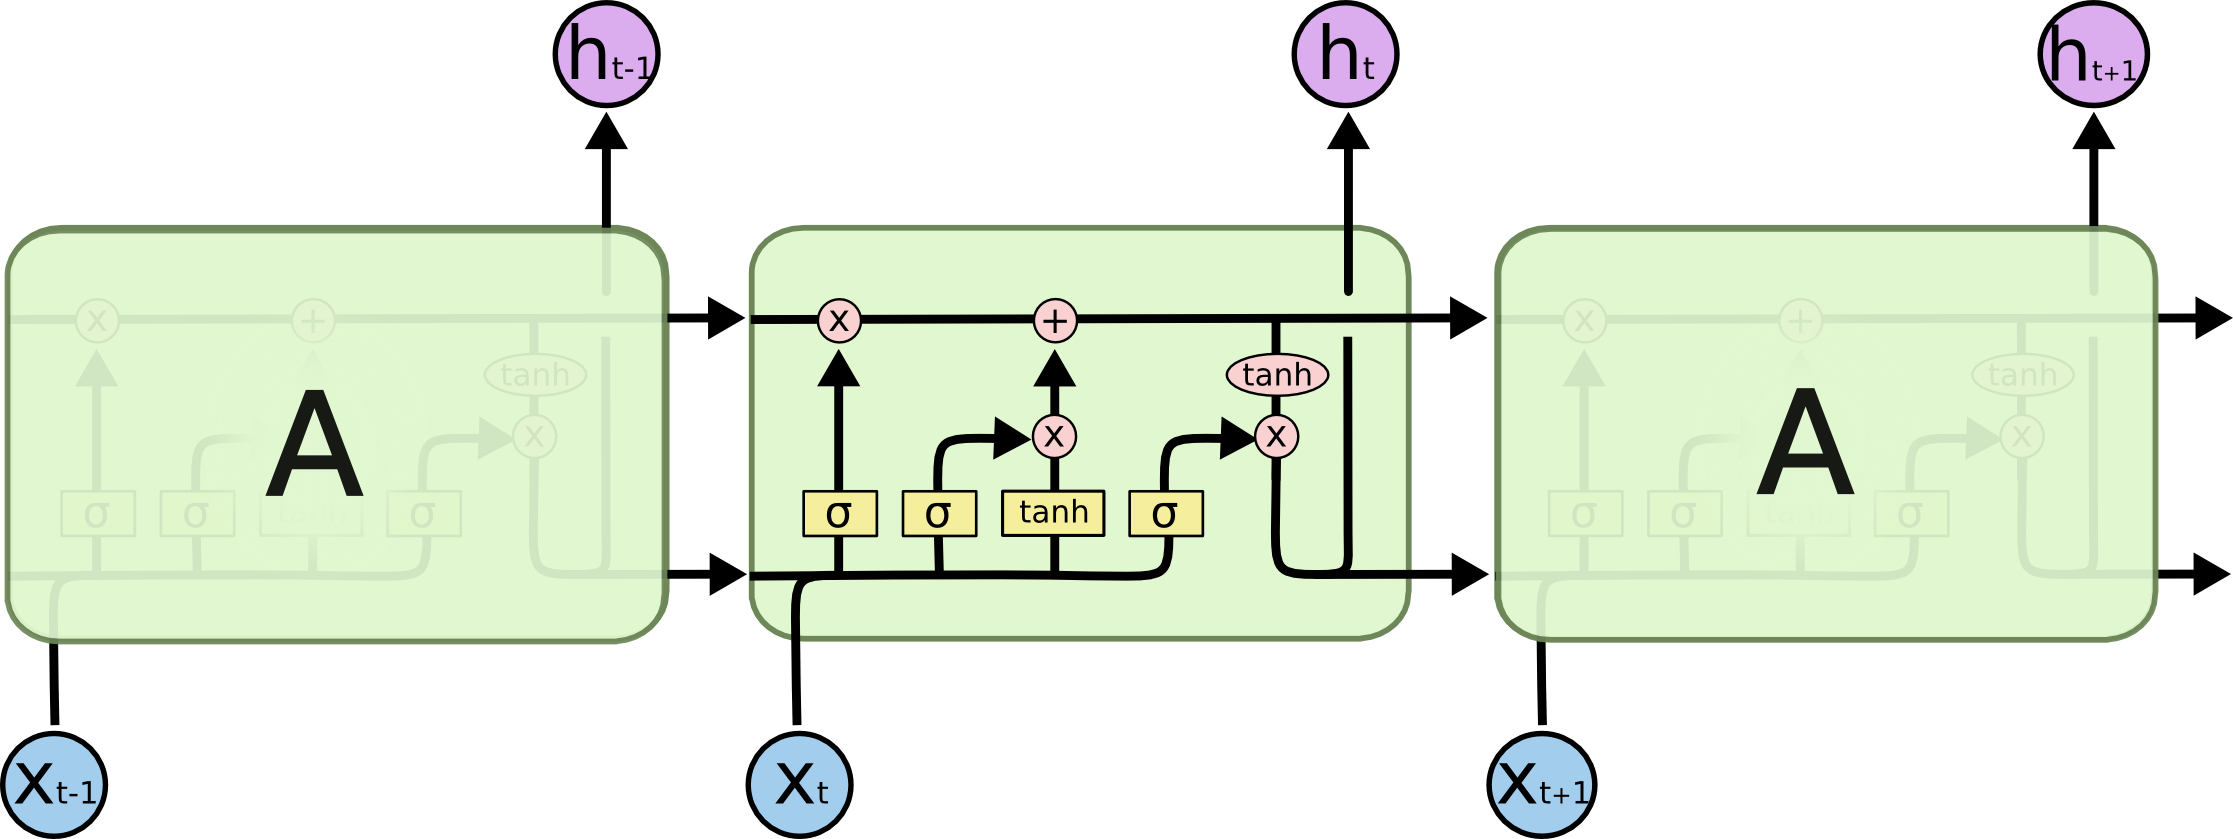The most salient feature present in a LSTM is the cell state(line running untouched throughout the layer). The forget gate layer(consisting os a neural net and pointwise vector multiplication) decides what we will the network remember and what it will forget.It looks at ht-1 and xt and outputs a number b/w 0,1. Then, we will decide what to store and what to not store. 

1) Sigmoid layer takes xt and ht-1 and decides which values we'll update. Then tanh layer creates a vector of new candidate values that will be added to the state. Then, we will update the cell state.

2)Then, we decide what we need to output. We will pass cell state through a sigmoid layer to decide what we need to output. Then, we pass it through the tanh layer to normalize it between -1 and 1. 

(http://colah.github.io/posts/2015-08-Understanding-LSTMs/)

In [299]:
#Building sequential model in Keras
from keras.models import Sequential
from keras.layers import LSTM, BatchNormalization,Dropout,Bidirectional,Dense
from keras.preprocessing import sequence

Using TensorFlow backend.


In [300]:
print('Loading data...')
print(len(X_train), 'train sequences')
print(len(X_test), 'test sequences')

Loading data...
114 train sequences
50 test sequences


In [301]:
print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(X_train,maxlen=1280)
x_test = sequence.pad_sequences(X_test,maxlen=1280)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

Pad sequences (samples x time)
x_train shape: (114, 1280)
x_test shape: (50, 1280)


Most of the classifiers(except the neural networks) is not giving good classification. So, we will use LSTM to classify the dataset. We will use Keras to run LSTM on the dataset.Keras is a neural network library written in python. It can run on Theanos, Tensorflow. We will use Sequential model( which arranges layers like a stack. We have used BatchNormalization. Every output of a layer is dependent on each layer and this leads to correlation between layers. So, if we make a change in one layer, it causes a change in other layer too. This problem is known as Internal Covariate Shift. Batch Normalization addresses this problem by normalizing the output of each layer in mini-batches, which decreases its effects on the layer in the next.(https://shubhamscavern.wordpress.com/2016/11/30/batch-normalization-using-keras/)

Relu is a rectifier function used in neural networks. It is similar to rectifier in electrical engineering. We only allow the positive input to get outputted to f(x). f(x) = max(x,0). They help in speeding up training and remove all the negative values of x(https://stats.stackexchange.com/questions/226923/why-do-we-use-relu-in-neural-networks-and-how-do-we-use-it)

Dense is also a regularization technique.Inthis technique, we first train the network and drop the weights which fall under a particular threshold. Then, we will make the network dense again and retrain the network it using a small capacity.(https://chatbotslife.com/regularization-in-deep-learning-f649a45d6e0)

Cross_entropy is a cost function which performs far better than the quadractic cost function. From its definition, we can see that it goes to 0 as we reach the desired output y. (http://neuralnetworksanddeeplearning.com/chap3.html#the_cross-entropy_cost_function)

Convert all the arrays to make them suitable to pass through LSTM

In [302]:
y_train_ = np.reshape(y_train,newshape=(1,114))
y_train_.shape

(1, 114)

Convert y_test's shape and pad it to make its shape similar to y_train.

In [303]:
y_test_ = np.reshape(y_test,newshape=(1,50))
y_test_ = sequence.pad_sequences(y_test_,maxlen=114)
y_test_.shape

(1, 114)

In [304]:
x_train = np.reshape(X_train,newshape=(1,114,1280))
x_train.shape

(1, 114, 1280)

In [305]:
x_test = np.reshape(X_test,newshape=(1,50,1280))
x_test = sequence.pad_sequences(x_test,maxlen=114)
x_test.shape

(1, 114, 1280)

In [306]:
print('Build model...')
#Stack of layers added to the model
model = Sequential()
model.add(BatchNormalization(input_shape = (114,1280)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(114,kernel_initializer='normal',activation='relu')))
model.add(Dense(114,activation='sigmoid',kernel_initializer='normal'))

Build model...


In [307]:
#Try using different optimizers and different optimizer configs
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=['accuracy'])

In [308]:
#Train sequential model
print('Train...')
model.fit(x_train,y_train_,batch_size=32,epochs=15,validation_data=(x_test,y_test_))


Train...
Train on 1 samples, validate on 1 samples
Epoch 1/15
1/1 [==============================] - 0s - loss: -0.0732 - acc: 0.0175 - val_loss: -17.9386 - val_acc: 0.2456
Epoch 2/15
1/1 [==============================] - 0s - loss: -17.2205 - acc: 0.0175 - val_loss: 19.6743 - val_acc: 0.2807
Epoch 3/15
1/1 [==============================] - 0s - loss: -37.6940 - acc: 0.0088 - val_loss: -30.1636 - val_acc: 0.2632
Epoch 4/15
1/1 [==============================] - 0s - loss: -89.1755 - acc: 0.0000e+00 - val_loss: -93.7348 - val_acc: 0.1930
Epoch 5/15
1/1 [==============================] - 0s - loss: -157.7859 - acc: 0.0000e+00 - val_loss: -133.2487 - val_acc: 0.1754
Epoch 6/15
1/1 [==============================] - 0s - loss: -221.9238 - acc: 0.0088 - val_loss: -100.6242 - val_acc: 0.1842
Epoch 7/15
1/1 [==============================] - 0s - loss: -287.4686 - acc: 0.0088 - val_loss: -146.6080 - val_acc: 0.1842
Epoch 8/15
1/1 [==============================] - 0s - loss: -301.1361 - acc

In [309]:
#Test set accuracy
score,acc = model.evaluate(x_test,y_test_,batch_size=24)
print("Test score:", score)
print("Test accuracy:", acc)

1/1 [==============================] - 0s
Test score: -205.955688477
Test accuracy: 0.122807018459


# Multi-label classification

We can perform multi-label classification in 2 ways: 

1 **Problem Transformation :** We can convert the multi-label data into single-label data and then, we perform classification in the same way as a single label classification.

2.**Algorithm Adaptation method :** We modify single label classification methods and apply it to multi-label data.

**Binary relevance** is an example of the Problem Transformation method. It learns q binary classifiers, where q is the total number of classes in the dataset, one for each label. In this method, we partition the original dataset into q different datasets, and we train a classifier on each of these datasets. If a particular instance contains a label L, then we label it positive, otherwise we label it negatively.
![binary relevance](binary relevance.png)
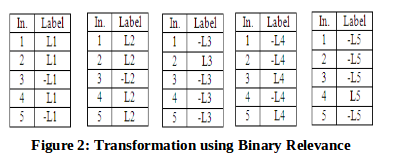(https://www.scribd.com/document/144817177/Binary-Relevance)

We will collect the multi-label samples of clapping and non-clapping respectively

In [310]:
examples = !grep /m/0l15bq balanced_train_segments.csv

In [311]:
examples

['0FMdORf5iGs, 30.000, 40.000, "/m/04rlf,/m/081rb,/m/09x0r,/m/0l15bq"',
 '1IxBagCJeZc, 150.000, 160.000, "/m/01j3sz,/m/09x0r,/m/0l15bq"',
 '1_DouJRW3PM, 30.000, 40.000, "/m/028ght,/m/09x0r,/m/0l15bq"',
 '2y9ikTsTsl0, 30.000, 40.000, "/m/028ght,/m/09x0r,/m/0l15bq"',
 '3PliaLqMSqg, 30.000, 40.000, "/m/028ght,/m/09x0r,/m/0l15bq"',
 '3ixOXsKUufM, 30.000, 40.000, "/m/0l15bq"',
 '4mOTOTJLv5U, 0.000, 10.000, "/m/09x0r,/m/0l15bq,/m/0ytgt"',
 '7Ep2a7_sbmc, 260.000, 270.000, "/m/09x0r,/m/0l15bq"',
 '7SpYywlGPyM, 30.000, 40.000, "/m/09x0r,/m/0k65p,/m/0l15bq,/m/0ytgt"',
 'AiGF0850kT8, 6.000, 16.000, "/m/04rlf,/m/0l15bq"',
 'ApJA85gwNFo, 30.000, 40.000, "/m/0l15bq"',
 'B-XS7rGmG0o, 30.000, 40.000, "/m/0l15bq"',
 'C3HqFyYZBGI, 30.000, 40.000, "/m/01h8n0,/m/09x0r,/m/0l15bq"',
 'CKogmNGkGHE, 180.000, 190.000, "/m/015lz1,/m/0326g,/m/04rlf,/m/09x0r,/m/0l15bq"',
 'Cq9_hnJw5Rs, 400.000, 410.000, "/m/09x0r,/m/0l15bq"',
 'DEBKRavuTfM, 10.000, 20.000, "/m/0l15bq"',
 'DSa3YoTNoZA, 0.000, 10.000, "/m/0k65p,/m/

In [312]:
examples = !grep /m/0l15bq balanced_train_segments.csv | cut -c -11
print(examples)

['0FMdORf5iGs', '1IxBagCJeZc', '1_DouJRW3PM', '2y9ikTsTsl0', '3PliaLqMSqg', '3ixOXsKUufM', '4mOTOTJLv5U', '7Ep2a7_sbmc', '7SpYywlGPyM', 'AiGF0850kT8', 'ApJA85gwNFo', 'B-XS7rGmG0o', 'C3HqFyYZBGI', 'CKogmNGkGHE', 'Cq9_hnJw5Rs', 'DEBKRavuTfM', 'DSa3YoTNoZA', 'DtWdvUgqmXw', 'E9etGzNH2SM', 'EL0KxeMuGEA', 'EWI6u8wVAlk', 'GSlve5cn8B8', 'IYNg-ibkliY', 'IpkSmoVcU20', 'K64Q5_51Io8', 'KDctVs_KcVI', 'MK1NzQm9XaQ', 'O44KCiT8shM', 'P4QGqUhJvMY', 'RPLYy1Xbwt4', 'Rqn3rDSGIR0', 'S40zKdprTj0', 'TrtetONKfvM', 'UMqR7-ja_iI', 'UjelVJif6-w', 'Xm-PEoPcmrE', 'YHj6tdG-6JU', 'ZEbjwwVKzaQ', '_LY8EpSdPrk', '_uyAyiLZJsM', 'a54qawS9wCk', 'e1eYWTJoIh0', 'h3u2sHDnXDs', 'hFTcS18hSn0', 'hNwXPMpR9aY', 'heGKGgxvJF8', 'l5sbP_vmgl8', 'mRSAoBtjLjI', 'nGmhfmCVnnc', 'nSIskMwIBKg', 'ohCVx7uRmz8', 'pIpdn-w12ok', 'sw2nfdNRAn0', 'teVE2waWdsU', 'tzvB-r8YaRc', 'u0Hdru-E-vI', 'u1a5eyk-9ig', 'xThlCygD5Kk', 'y4EOFoW0ix8', 'z1MI4zZ_UtQ']


In [313]:
tfrecord_prefixes = set([i[:2] for i in examples])

In [314]:
tfrecord_prefixes

{'0F',
 '1I',
 '1_',
 '2y',
 '3P',
 '3i',
 '4m',
 '7E',
 '7S',
 'Ai',
 'Ap',
 'B-',
 'C3',
 'CK',
 'Cq',
 'DE',
 'DS',
 'Dt',
 'E9',
 'EL',
 'EW',
 'GS',
 'IY',
 'Ip',
 'K6',
 'KD',
 'MK',
 'O4',
 'P4',
 'RP',
 'Rq',
 'S4',
 'Tr',
 'UM',
 'Uj',
 'Xm',
 'YH',
 'ZE',
 '_L',
 '_u',
 'a5',
 'e1',
 'h3',
 'hF',
 'hN',
 'he',
 'l5',
 'mR',
 'nG',
 'nS',
 'oh',
 'pI',
 'sw',
 'te',
 'tz',
 'u0',
 'u1',
 'xT',
 'y4',
 'z1'}

In [315]:
tfrecord_filenames = ["bal_train/" + i + ".tfrecord" for i in tfrecord_prefixes]

In [316]:
tfrecord_filenames

['bal_train/4m.tfrecord',
 'bal_train/_L.tfrecord',
 'bal_train/l5.tfrecord',
 'bal_train/nG.tfrecord',
 'bal_train/xT.tfrecord',
 'bal_train/KD.tfrecord',
 'bal_train/hF.tfrecord',
 'bal_train/nS.tfrecord',
 'bal_train/Uj.tfrecord',
 'bal_train/RP.tfrecord',
 'bal_train/Ip.tfrecord',
 'bal_train/h3.tfrecord',
 'bal_train/oh.tfrecord',
 'bal_train/te.tfrecord',
 'bal_train/Rq.tfrecord',
 'bal_train/0F.tfrecord',
 'bal_train/P4.tfrecord',
 'bal_train/MK.tfrecord',
 'bal_train/mR.tfrecord',
 'bal_train/Ap.tfrecord',
 'bal_train/IY.tfrecord',
 'bal_train/E9.tfrecord',
 'bal_train/Dt.tfrecord',
 'bal_train/hN.tfrecord',
 'bal_train/y4.tfrecord',
 'bal_train/7E.tfrecord',
 'bal_train/_u.tfrecord',
 'bal_train/2y.tfrecord',
 'bal_train/Tr.tfrecord',
 'bal_train/C3.tfrecord',
 'bal_train/sw.tfrecord',
 'bal_train/tz.tfrecord',
 'bal_train/K6.tfrecord',
 'bal_train/Xm.tfrecord',
 'bal_train/1_.tfrecord',
 'bal_train/a5.tfrecord',
 'bal_train/7S.tfrecord',
 'bal_train/GS.tfrecord',
 'bal_train/

In [317]:
audio_embeddings_dict_clapping = {}
audio_labels_dict_clapping = {}

#Load embeddings
sess = tf.Session()
for tfrecord in tfrecord_filenames:
    for example in tf.python_io.tf_record_iterator(tfrecord):
        tf_example = tf.train.Example.FromString(example)
        vid_id = tf_example.features.feature['video_id'].bytes_list.value[0].decode(encoding = "UTF-8")
        if vid_id in examples:
            example_label = list(np.asarray(tf_example.features.feature['labels'].int64_list.value))
            tf_seq_example = tf.train.SequenceExample.FromString(example)
            n_frames = len(tf_seq_example.feature_lists.feature_list['audio_embedding'].feature)
            
            audio_frame = []
            for i in range(n_frames):
                audio_frame.append(tf.cast(tf.decode_raw(tf_seq_example.feature_lists.
                feature_list['audio_embedding'].feature[i].bytes_list.value[0],tf.uint8),tf.float32).
                    eval(session = sess))
                audio_embeddings_dict_clapping[vid_id] = audio_frame
                audio_labels_dict_clapping[vid_id] = example_label
                

In [318]:
len(audio_labels_dict_clapping)

60

We will extract the embeddings and labels for non-clapping examples now

In [319]:
len(non_examples_clapping)

903

In [320]:
non_examples_clapping

['-DvxsHG1tuo',
 '-uCkr7KFkYg',
 '1--9ZSW-7Rg',
 '1ej-NI9vgkk',
 '2TauJ1KBMdY',
 '2hBVVym00rc',
 '3sApQ80QRiE',
 '4nPihZzUq_k',
 '5L-sKSpgHwk',
 '5fM3QwAAZQ0',
 '6e0F1Y6aMZk',
 '7oGd1ucd8r0',
 '7qWiBG8N10A',
 'BnFJ87ZwU-A',
 'CIiZFckAT5M',
 'CSfJWw9cM2s',
 'Cu_zqJWgALM',
 'DPzoYrz6Mi8',
 'DeNCHPXfMhM',
 'ESw7bibTj4A',
 'FXPzzMf6W8g',
 'G__lySaTeNM',
 'GtGaiVGQ33w',
 'HXWWFYcVJto',
 'IV-RGxUofVQ',
 'J9ZQcJJBmj4',
 'JQz76trKbNk',
 'LUQfjwASDq4',
 'RlJ5DvWC_yY',
 'V5HMIxuAtv8',
 'VOUm1PTYpB0',
 'WMsGCMfaKbs',
 'X62-7mo72jA',
 'X7weoQRFmc0',
 'YVb3KEwK1Uc',
 '_Xq-8R7CB44',
 '_ud-sCXmue0',
 'cEsF3Oh1-gU',
 'cSrL0BXsO40',
 'd-V3FtnzYLo',
 'ddsEVCK5qZw',
 'dfL7O46o9Wo',
 'drVo5VQfsDc',
 'hPSK-10z-kQ',
 'iYrfMKz1xE8',
 'ity1vO-OyDM',
 'kVQbu_BsZ9o',
 'k_kRSOra2qA',
 'lADzLzhjqPw',
 'lm_K_5nwhCk',
 'mYsjO2kEXRA',
 'mcyM8m5D8uE',
 'miwuZGdJKtI',
 'pOPg5gfWwTs',
 'ppCtPNVwU7I',
 'upcL7tojfd4',
 'wcby3DVW57s',
 'xHqgVaGI21g',
 'y2AulW5N9PE',
 'zOOasM0HvsY',
 '-5-vmt2iKT0',
 '0150dZu3Na8',
 '1QrqkC

In [321]:
tfrecord_prefixes_non = set([i[:2] for i in non_examples_clapping])

In [322]:
tfrecord_filenames_non = ["bal_train/" + i + ".tfrecord" for i in tfrecord_prefixes_non]

In [323]:
tfrecord_filenames_non

['bal_train/Kz.tfrecord',
 'bal_train/pc.tfrecord',
 'bal_train/O9.tfrecord',
 'bal_train/JD.tfrecord',
 'bal_train/E0.tfrecord',
 'bal_train/WD.tfrecord',
 'bal_train/i4.tfrecord',
 'bal_train/zu.tfrecord',
 'bal_train/-l.tfrecord',
 'bal_train/SO.tfrecord',
 'bal_train/69.tfrecord',
 'bal_train/Zv.tfrecord',
 'bal_train/z8.tfrecord',
 'bal_train/Sw.tfrecord',
 'bal_train/VW.tfrecord',
 'bal_train/-7.tfrecord',
 'bal_train/VH.tfrecord',
 'bal_train/S8.tfrecord',
 'bal_train/F7.tfrecord',
 'bal_train/pL.tfrecord',
 'bal_train/AK.tfrecord',
 'bal_train/EY.tfrecord',
 'bal_train/f1.tfrecord',
 'bal_train/Mb.tfrecord',
 'bal_train/OW.tfrecord',
 'bal_train/_o.tfrecord',
 'bal_train/qT.tfrecord',
 'bal_train/bC.tfrecord',
 'bal_train/TF.tfrecord',
 'bal_train/qW.tfrecord',
 'bal_train/ur.tfrecord',
 'bal_train/pI.tfrecord',
 'bal_train/B2.tfrecord',
 'bal_train/pz.tfrecord',
 'bal_train/rg.tfrecord',
 'bal_train/qt.tfrecord',
 'bal_train/wf.tfrecord',
 'bal_train/WA.tfrecord',
 'bal_train/

In [324]:
audio_embeddings_dict_clapping_non = {}
audio_labels_dict_clapping_non = {}

#Load embeddings
sess = tf.Session()
for tfrecord in tfrecord_filenames:
    for example in tf.python_io.tf_record_iterator(tfrecord):
        tf_example = tf.train.Example.FromString(example)
        vid_id = tf_example.features.feature['video_id'].bytes_list.value[0].decode(encoding = "UTF-8")
        if vid_id in non_examples_clapping:
            example_label = list(np.asarray(tf_example.features.feature['labels'].int64_list.value))
            tf_seq_example = tf.train.SequenceExample.FromString(example)
            n_frames = len(tf_seq_example.feature_lists.feature_list['audio_embedding'].feature)
            
            audio_frame = []
            for i in range(n_frames):
                audio_frame.append(tf.cast(tf.decode_raw(tf_seq_example.feature_lists.
                feature_list['audio_embedding'].feature[i].bytes_list.value[0],tf.uint8),tf.float32).
                    eval(session = sess))
                audio_embeddings_dict_clapping_non[vid_id] = audio_frame
                audio_labels_dict_clapping_non[vid_id] = example_label
                

In [325]:
len(audio_embeddings_dict_clapping_non)

17

In [326]:
audio_embeddings_dict_clapping_non

{'1_DouJRW3PM': [array([  79.,  231.,  186.,  255.,  162.,   80.,  110.,  246.,  121.,
          169.,   44.,  199.,  180.,   63.,   62.,    0.,   72.,  255.,
            0.,  238.,  155.,  125.,  140.,   71.,   20.,  160.,   12.,
           10.,  180.,  215.,  102.,  123.,  159.,  212.,  201.,   20.,
          255.,  157.,    0.,  203.,  210.,    0.,  157.,  231.,  240.,
          255.,    0.,  218.,    3.,    0.,  187.,  198.,  235.,  255.,
          235.,   14.,  255.,  255.,    0.,   62.,    0.,  255.,  254.,
          227.,    0.,    3.,  240.,   86.,    0.,  245.,  233.,   79.,
            0.,  216.,  108.,   70.,  255.,  255.,    0.,    0.,    0.,
          192.,   72.,    0.,  255.,  147.,    0.,  225.,    0.,    0.,
          255.,   36.,  255.,   71.,  255.,  238.,    0.,  153.,    0.,
          215.,  243.,  255.,  149.,   99.,  255.,  107.,   62.,    0.,
            0.,   52.,   30.,    0.,  144.,   23.,    0.,  252.,    0.,
          123.,   22.,    0.,  255.,   80.,    0.

In [327]:
audio_labels_dict_clapping_non

{'1_DouJRW3PM': [0, 63, 67],
 '2y9ikTsTsl0': [0, 63, 67],
 '3PliaLqMSqg': [0, 63, 67],
 'C3HqFyYZBGI': [0, 4, 63],
 'C3msYakeZUE': [0, 3, 6],
 'DtgdD48804M': [65, 137],
 'E9vVmkq9Puc': [0, 7],
 'EWI6u8wVAlk': [63, 67, 69],
 'K6Ff4JRgj0s': [0, 49, 137],
 'P4Vp5cMKjL0': [0, 3, 47, 137],
 'Tr58sD07MHU': [9, 137],
 '_ud-sCXmue0': [0, 1, 16],
 'heAw4z71lvo': [0, 67],
 'ohpWTvrGycU': [0, 62],
 'pIQulLl44zs': [0, 2, 137],
 'sw2nfdNRAn0': [63, 67],
 'swd5kCLRtTs': [62]}

In [328]:
audio_labels_dict_clapping

{'0FMdORf5iGs': [0, 63, 137, 387],
 '1IxBagCJeZc': [0, 16, 63],
 '1_DouJRW3PM': [0, 63, 67],
 '2y9ikTsTsl0': [0, 63, 67],
 '3PliaLqMSqg': [0, 63, 67],
 '3ixOXsKUufM': [63],
 '4mOTOTJLv5U': [0, 3, 63],
 '7Ep2a7_sbmc': [0, 63],
 '7SpYywlGPyM': [0, 3, 61, 63],
 'AiGF0850kT8': [63, 137],
 'ApJA85gwNFo': [63],
 'B-XS7rGmG0o': [63],
 'C3HqFyYZBGI': [0, 4, 63],
 'CKogmNGkGHE': [0, 27, 63, 137, 250],
 'Cq9_hnJw5Rs': [0, 63],
 'DEBKRavuTfM': [63],
 'DSa3YoTNoZA': [3, 61, 63],
 'DtWdvUgqmXw': [0, 63, 137],
 'E9etGzNH2SM': [0, 3, 63],
 'EL0KxeMuGEA': [0, 63],
 'EWI6u8wVAlk': [63, 67, 69],
 'GSlve5cn8B8': [63],
 'IYNg-ibkliY': [0, 63],
 'IpkSmoVcU20': [0, 63, 467, 507],
 'K64Q5_51Io8': [3, 61, 63],
 'KDctVs_KcVI': [34, 63],
 'MK1NzQm9XaQ': [63],
 'O44KCiT8shM': [0, 63],
 'P4QGqUhJvMY': [0, 3, 61, 63],
 'RPLYy1Xbwt4': [63],
 'Rqn3rDSGIR0': [0, 63],
 'S40zKdprTj0': [63, 137],
 'TrtetONKfvM': [27, 61, 63],
 'UMqR7-ja_iI': [63],
 'UjelVJif6-w': [0, 63, 360],
 'Xm-PEoPcmrE': [0, 3, 27, 63],
 'YHj6tdG-6

Now, we will combine both the lists to give us 1 labels and embeddings list

In [329]:
np.asarray(([audio_labels_dict_clapping_non[k] for k in audio_labels_dict_clapping_non])).shape

(17,)

In [330]:
np.asarray(([audio_embeddings_dict_clapping_non[k] for k in audio_embeddings_dict_clapping_non])).shape

(17,)

In [331]:
np.asarray(([audio_embeddings_dict_clapping[k] for k in audio_embeddings_dict_clapping])).shape

(60,)

In [332]:
np.asarray(([audio_labels_dict_clapping[k] for k in audio_labels_dict_clapping])).shape

(60,)

In [333]:
audio_labels_dict_tot = {**audio_labels_dict_clapping,**audio_labels_dict_clapping_non}

In [334]:
len(audio_labels_dict_tot)

71

In [335]:
audio_embeddings_dict_tot = {**audio_embeddings_dict_clapping,**audio_embeddings_dict_clapping_non}

In [336]:
len(audio_embeddings_dict_tot)

71

In [337]:
labels_ovr = np.asarray(([audio_labels_dict_tot[k] for k in audio_labels_dict_tot]))

In [338]:
labels_ovr.shape

(71,)

In [339]:
labels_ovr[1]

[0, 63]

In [340]:
features_ovr = np.asarray(([audio_embeddings_dict_tot[k] for k in audio_embeddings_dict_tot]))

In [341]:
features_ovr.shape

(71,)

In [342]:
features_ovr

array([ list([array([ 128.,  105.,  162.,   62.,  105.,  162.,   92.,   61.,  255.,
        103.,    0.,   85.,  137.,  206.,    0.,  111.,  100.,   74.,
        163.,   54.,  175.,  153.,  173.,  142.,   86.,  157.,  154.,
         63.,  230.,    9.,   65.,   12.,  178.,   16.,  103.,  174.,
        164.,   39.,  151.,    0.,    0.,   96.,    5.,  255.,  148.,
        129.,   82.,  134.,   45.,  255.,  149.,  175.,    0.,    0.,
         99.,  243.,  230.,    0.,    0.,    5.,   96.,  179.,   72.,
        255.,  185.,  140.,   76.,   93.,  250.,  255.,  191.,    9.,
        169.,  155.,  103.,  156.,  220.,  104.,  246.,  148.,  115.,
         71.,  161.,   64.,  200.,   59.,    0.,  224.,    0.,  163.,
         53.,  225.,  109.,  137.,   25.,  155.,  175.,  159.,  142.,
          6.,   51.,  233.,  255.,  105.,  124.,  206.,  137.,   42.,
         22.,  255.,  151.,   60.,    0.,    0.,    0.,  185.,  255.,
        108.,  214.,   66.,   44.,   56.,  167.,  174.,  255.,  102.,
      

We will convert the features to a form suitable to perform OVR classification.

In [343]:
labels.shape

(164, 1)

We know will create one array to store all the embeddings. The arrays a, b,c,d,e,f,g,h,i,j will store the 10 separate feature vectors

In [344]:
a = np.array(eval('[0]*128'))
b = np.array(eval('[0]*128'))
c = np.array(eval('[0]*128'))
d = np.array(eval('[0]*128'))
e = np.array(eval('[0]*128'))
f = np.array(eval('[0]*128'))
g = np.array(eval('[0]*128'))
h = np.array(eval('[0]*128'))
i = np.array(eval('[0]*128'))
j = np.array(eval('[0]*128'))
features_arr = np.array(eval('[[0]*1280]*71'))

# In some embeddings, the feature vectors may not be 10. We will take out all those embeddings having less than 10 feature vectors. We will try to normalize the embeddings to have 10 feature vectors by padding feature vectors containing all 0s.

In [345]:
no_feats_less_0 = []

In [346]:
for count in range(len(features_ovr)):
    if( len(features_ovr[count]) != 10):
        no_feats_less_0.append(count)
    

In [347]:
no_feats_less_0

[30, 49, 67]

We will perform the following padding steps

arr_padded will be all 0 vector which we will pad to the feature vectors that require padding

In [348]:
arr_padded = eval('[0]*128')

In [349]:
arr_padded = np.array(eval('[0]*128'),np.float32)

In [353]:
arr_padded

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.], dtype=float32)

Perform padding of all the arrays present in the features

In [375]:
for count in range(len(no_feats_less_0)):
    arr_ind = no_feats_less_0[count]
    arr_to_be_padded = features_ovr[arr_ind]
    #Perform padding
    no_times_pad = 10 - len(arr_to_be_padded)
    print(no_times_pad)
    for j in range(no_times_pad):
        arr_to_be_padded.insert(len(arr_to_be_padded),arr_padded)

2
1
5


Now, we will store all the feature vectors in 1 feature vector for all the 164 labels

In [379]:
for count in range(len(features_ovr)):
    print(count)
    a = features_ovr[count][0]
    b = features_ovr[count][1]
    c = features_ovr[count][2]
    d = features_ovr[count][3]
    e = features_ovr[count][4]
    f = features_ovr[count][5]
    g = features_ovr[count][6]
    h = features_ovr[count][7]
    i = features_ovr[count][8]
    j = features_ovr[count][9]
    features_arr[count] = np.concatenate([a,b,c,d,e,f,g,h,i,j],axis = 0)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70


Divide the dataset into testing and training datasets respectively

In [413]:
X_train,X_test,y_train,y_test = train_test_split(features_arr,bin_labels,test_size = 0.3,random_state = 0)


Running binary relevance classifier on dataset

In [404]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import MultiLabelBinarizer

bin_labels = MultiLabelBinarizer().fit_transform(labels_ovr)



In [415]:
OneVsRestClassifier(LinearSVC(random_state= 0)).fit(X_train,y_train).score(X_test,y_test)

/home/anirudh/anaconda3/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2 is present in all training examples.
  str(classes[c]))
/home/anirudh/anaconda3/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 6 is present in all training examples.
  str(classes[c]))
/home/anirudh/anaconda3/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 7 is present in all training examples.
  str(classes[c]))
/home/anirudh/anaconda3/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 9 is present in all training examples.
  str(classes[c]))
/home/anirudh/anaconda3/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 19 is present in all training examples.
  str(classes[c]))


0.045454545454545456